# i. Perkenalan

Halo semuanya!

Saya Muhammad Farhan Salimuddin biasa dipanggil Farhan dari Hacktiv8 FTDS RMT 020
ingin memprediksi nasabah yang akan membayar pinjaman dan yang tidak membayar, dan juga menghitung berapa nilai yang hilang apabila nasabah tidak membayar,
menggunakan data yang berasaldari [Kaggle](https://www.kaggle.com/datasets/nurudeenabdulsalaam/prosper-loan-dataset), untuk penjelasan setiap kolomnya ada [disini](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

Semoga tahapan pengerjaan yang saya lakukan dapat dipahami oleh para pembaca, *happy coding*!

# ii. Memasukkan library
Library yang dimasukkan adalah yang akan digunakan dalam pengerjaan

In [81]:
# Untuk proses dataset
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Untuk Pemodelan
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Untuk bagian model saving
import joblib

In [2]:
'''
# Import Google Drive buat ambil kaggle json, disini saya simpan di google drive agar tidak bolak balik upload
from google.colab import drive
drive.mount('/content/drive')

# Mendownload dataset dari kaggle
!mkdir /root/.kaggle                                                                  # Membuat folder .kaggle di /root
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' /root/.kaggle/kaggle.json    # Mengcopy kaggle.json ke folder /root/.kaggle
!kaggle datasets download -d nurudeenabdulsalaam/prosper-loan-dataset                 # Mendownload dataset dari Kaggle
!unzip -n /content/prosper-loan-dataset.zip                                           # Ekstrak download dari kaggle, -n = never overwrite
'''

"\n# Import Google Drive buat ambil kaggle json, disini saya simpan di google drive agar tidak bolak balik upload\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# Mendownload dataset dari kaggle\n!mkdir /root/.kaggle                                                                  # Membuat folder .kaggle di /root\n!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' /root/.kaggle/kaggle.json    # Mengcopy kaggle.json ke folder /root/.kaggle\n!kaggle datasets download -d nurudeenabdulsalaam/prosper-loan-dataset                 # Mendownload dataset dari Kaggle\n!unzip -n /content/prosper-loan-dataset.zip                                           # Ekstrak download dari kaggle, -n = never overwrite\n"

# iii. Data Loading

In [3]:
# Load dataset hasil download dan ekstrak
data_ori = pd.read_csv ('./prosperLoanData.csv')   # Memasukkan csv menjadi dataframe
data = data_ori.copy()                                    # Menduplikat data agar memiliki data asli dan data yang diproses
data                                                      # Menampilkan isi dataframe

ListingKey  ListingNumber ListingCreationDate  \
0       09E1336627538645259AE42            908             18:58.5   
1       A66F3364632427736031107           6328             35:35.9   
2       093D3365430569291709120           8912             23:10.1   
3       F77F33664545520971829DC           7646             59:15.2   
4       F737336598792393701AF04          11094             59:31.8   
...                         ...            ...                 ...   
113932  D01735804705532725E9C17         793414             23:25.5   
113933  75CB3586158361687FEB10C         864630             20:10.9   
113934  DAE435899343502411826FD         908411             56:19.5   
113935  175F3592204159489436B1F         964821             52:44.1   
113936  53AE359481412617687A5EF         999068             21:38.8   

       CreditGrade  Term LoanStatus       ClosedDate  BorrowerAPR  \
0               HR    36  Cancelled   3/29/2006 0:00      0.20735   
1                D    36  Defaulted   9/22/2006 0:00      0.23497   
2               HR    36  Cancelled   5/31/2006 0:00      0.25650   
3                C    36  Cancelled   5/31/2006 0:00      0.14659   
4                E    36  Defaulted  10/11/2006 0:00      0.24502   
...            ...   ...        ...              ...          ...   
113932         NaN    60  Completed   7/18/2013 0:00      0.20593   
113933         NaN    60  Completed   2/24/2014 0:00      0.13227   
113934         NaN    60  Completed   12/4/2013 0:00      0.14760   
113935         NaN    60  Completed   11/6/2013 0:00      0.16294   
113936         NaN    36  Completed    1/3/2014 0:00      0.12274   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0             0.2000       0.1950  ...            0.00               0.00   
1             0.2275       0.2225  ...            0.00             -80.77   
2             0.2375       0.2325  ...            0.00               0.00   
3             0.1395       0.1345  ...            0.00               0.00   
4             0.2375       0.2200  ...            0.00              -3.06   
...              ...          ...  ...             ...                ...   
113932        0.1819       0.1719  ...          -22.28               0.00   
113933        0.1099       0.0999  ...         -173.50               0.00   
113934        0.1249       0.1149  ...          -71.23               0.00   
113935        0.1399       0.1299  ...          -26.85               0.00   
113936        0.0949       0.0849  ...          -46.55               0.00   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                         0.0                 0.00   
1                     10000.0              9004.98   
2                         0.0                 0.00   
3                         0.0                 0.00   
4                      3001.0              3001.00   
...                       ...                  ...   
113932                    0.0                 0.00   
113933                    0.0                 0.00   
113934                    0.0                 0.00   
113935                    0.0                 0.00   
113936                    0.0                 0.00   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                 0.00            1.0                0   
1                              2755.12            1.0                0   
2                                 0.00            1.0                0   
3                                 0.00            1.0                0   
4                               100.00            1.0                0   
...                                ...            ...              ...   
113932                            0.00            1.0                0   
113933                            0.00            1.0                0   
113934                            0.00            1.0                0   
113935                            0.0

## Memperlihatkan tipe kolom

Terlihat tipe kolom yang ada dan melihat jumlah data yang ada, terdapat juga data yang kosong (null)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Memperlihatkan statistik data
Data yang terlihat adalah yang berjenis numerical(integer/float)

In [5]:
data.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

## Melihat jumlah dataset dan kolom

In [6]:
print (f'Dataset berjumlah {data.shape[0]} baris dan {data.shape[1]} kolom')

Dataset berjumlah 113937 baris dan 81 kolom


## Mengubah angka pada data kategori
Angka yang memiliki arti dirubah menjadi arti asli

Pada kolom ProsperRating
Pada dataset terdapat ProsperRating (numeric) dan ProsperRating (alpha), kedua kolom ini memiliki makna yang sama, sehingga akan disatukan.
Pada kolom tersebut terdapat data null, tetapi berdasarkan penjelasan kolom terdapat nilai 0 dan N/A, sedangkan tidak terdapat pada dataframe, sehingga yang null akan diisi nilai 0

In [7]:
data['ProsperRating (Alpha)'] = data['ProsperRating (Alpha)'].fillna('N/A')     # Mengisi data yang null dengan 0

data = data.drop(columns=['ProsperRating (numeric)'])                           # Membuang kolom yang memiliki makna yang sama

data.rename(columns={'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)   # Merubah nama kolom

Pada kolom 'ListingCategory (numeric)'

In [8]:
label_pada_ListingCategory = {
0 : 'Not Available',
1 : 'Debt Consolidation',
2 : 'Home Improvement',
3 : 'Business',
4 :' Personal Loan',
5 : 'Student Use',
6 : 'Auto',
7 : 'Other',
8 : 'Baby&Adoption',
9 : 'Boat',
10 : 'Cosmetic Procedure',
11 : 'Engagement Ring',
12 : 'Green Loans',
13 : 'Household Expenses',
14 : 'Large Purchases',
15 : 'Medical/Dental',
16 : 'Motorcycle',
17 : 'RV',
18 : 'Taxes',
19 : 'Vacation',
20 : 'Wedding Loans'
}

def label_ListringCategory(data):
    if data['ListingCategory (numeric)'] in label_pada_ListingCategory.keys():
        label = label_pada_ListingCategory[data['ListingCategory (numeric)']]
        return label
    else:
        return data['ListingCategory (numeric)']

data['ListingCategory (numeric)'] = data.apply(label_ListringCategory, axis=1)

data.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)   # Merubah nama kolom

## Mengecek setelah perubahan jenis data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Mengecek duplikat
Melihat adanya duplikat pada kolom yang seharusnya unique seperti kolom
'ListingKey',
'ListingNumber',
'LoanKey', dan
'LoanNumber'

Kolom 'ListingKey'

In [10]:
Listing_Key = data['ListingKey']
data[Listing_Key.isin(Listing_Key[Listing_Key.duplicated()])].sort_values("ListingKey")

ListingKey  ListingNumber ListingCreationDate CreditGrade  \
20229  00223594917038064A7C947         998257             58:37.2         NaN   
20228  00223594917038064A7C947         998257             58:37.2         NaN   
51531  00473590513960687DD308F         941296             47:36.0         NaN   
51530  00473590513960687DD308F         941296             47:36.0         NaN   
5546   0098360461900952056DB93        1190614             21:39.6         NaN   
...                        ...            ...                 ...         ...   
15668  FEF9358974260956441C450         906461             32:50.0         NaN   
16131  FF1B3590569175597E6830C         935199             14:30.2         NaN   
16132  FF1B3590569175597E6830C         935199             14:30.2         NaN   
3083   FFE13600149501913291BF7        1122473             59:42.0         NaN   
3082   FFE13600149501913291BF7        1122473             59:42.0         NaN   

       Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
20229    36    Current        NaN      0.23540        0.1980       0.1880   
20228    36    Current        NaN      0.23540        0.1980       0.1880   
51531    60    Current        NaN      0.22242        0.1980       0.1880   
51530    60    Current        NaN      0.22242        0.1980       0.1880   
5546     36    Current        NaN      0.29660        0.2574       0.2474   
...     ...        ...        ...          ...           ...          ...   
15668    36    Current        NaN      0.21699        0.1800       0.1700   
16131    36    Current        NaN      0.15833        0.1299       0.1199   
16132    36    Current        NaN      0.15833        0.1299       0.1199   
3083     36    Current        NaN      0.29455        0.2554       0.2454   
3082     36    Current        NaN      0.29455        0.2554       0.2454   

       ...  LP_ServiceFees  LP_CollectionFees  LP_GrossPrincipalLoss  \
20229  ...          -12.34                0.0                    0.0   
20228  ...          -12.34                0.0                    0.0   
51531  ...          -73.12                0.0                    0.0   
51530  ...          -73.12                0.0                    0.0   
5546   ...            0.00                0.0                    0.0   
...    ...             ...                ...                    ...   
15668  ...           -8.64                0.0                    0.0   
16131  ...           -8.14                0.0                    0.0   
16132  ...           -8.14                0.0                    0.0   
3083   ...            0.00                0.0                    0.0   
3082   ...            0.00                0.0                    0.0   

      LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
20229                 0.0                              0.0           1.0   
20228                 0.0                              0.0           1.0   
51531                 0.0                              0.0           1.0   
51530                 0.0                              0.0           1.0   
5546                  0.0                              0.0           1.0   
...                   ...                              ...           ...   
15668                 0.0                              0.0           1.0   
16131                 0.0                              0.0           1.0   
16132                 0.0                              0.0           1.0   
3083                  0.0                              0.0           1.0   
3082                  0.0                              0.0           1.0   

      Recommendations InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
20229               0                          0                         0.0   
20228               0                          0                         0.0   
51531               0                          0                         0.0   
51530               0   

Jika dilihat diatas, terdapat duplikat pada kolom 'ListingKey', dan dilihat pada kolom lainnya memiliki nilai yang sama, sehingga harus dihilangkan nilai yang duplikat tersebut.

In [11]:
data.drop_duplicates(subset='ListingKey', inplace=True)
data.shape

(112726, 80)

Kolom 'ListingNumber'

In [12]:
Listing_Number = data['ListingNumber']
data[Listing_Number.isin(Listing_Number[Listing_Number.duplicated()])].sort_values("ListingNumber")

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating, ProsperScore, ListingCategory, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 80 columns]

Kolom 'LoanKey'

In [13]:
Loan_Key = data['LoanKey']
data[Loan_Key.isin(Loan_Key[Loan_Key.duplicated()])].sort_values("LoanKey")

ListingKey  ListingNumber ListingCreationDate CreditGrade  \
85526  C2B83541657922388984D20         570337             07:01.7         NaN   
19127  958E3576773804594DFCBFD         762432             48:01.7         NaN   
20232  A09033770540128929DAC42          80565             36:08.6          HR   
99269  B850340262026695977DE97         212579             50:25.4           A   
48430  DDF23564982122120E1C19A         680964             27:38.3         NaN   
...                        ...            ...                 ...         ...   
32292  F2DD3577466761899FBAD13         772753             23:22.0         NaN   
77456  98CA3402330698831BA236D         217444             25:33.2           B   
68664  8A7F35605998946829C5D74         660850             26:17.7         NaN   
91090  AF223367140783964C34925          34206             15:11.4           A   
67239  4C0A3557361454918091861         639225             16:54.0         NaN   

       Term  LoanStatus       ClosedDate  BorrowerAPR  BorrowerRate  \
85526    36   Completed   7/15/2013 0:00      0.17359        0.1449   
19127    60     Current              NaN      0.26877        0.2432   
20232    36  Chargedoff   2/16/2008 0:00      0.25757        0.2500   
99269    36   Completed    7/9/2009 0:00      0.11696        0.1100   
48430    36     Current              NaN      0.34045        0.3006   
...     ...         ...              ...          ...           ...   
32292    36     Current              NaN      0.32538        0.2859   
77456    36   Completed  10/25/2010 0:00      0.14709        0.1400   
68664    60     Current              NaN      0.24764        0.2226   
91090    36   Completed    9/6/2009 0:00      0.11586        0.1089   
67239    36     Current              NaN      0.09736        0.0839   

       LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
85526       0.1349  ...          -43.46               0.00   
19127       0.2332  ...          -25.51               0.00   
20232       0.2450  ...           -5.93             -21.29   
99269       0.1050  ...          -44.75               0.00   
48430       0.2906  ...          -40.67               0.00   
...            ...  ...             ...                ...   
32292       0.2759  ...          -25.09               0.00   
77456       0.1300  ...          -49.47               0.00   
68664       0.2126  ...         -174.54               0.00   
91090       0.1039  ...          -40.57               0.00   
67239       0.0739  ...          -56.49               0.00   

       LP_GrossPrincipalLoss LP_NetPrincipalLoss  \
85526                   0.00                0.00   
19127                   0.00                0.00   
20232                2238.18             2238.19   
99269                   0.00                0.00   
48430                   0.00                0.00   
...                      ...                 ...   
32292                   0.00                0.00   
77456                   0.00                0.00   
68664                   0.00                0.00   
91090                   0.00                0.00   
67239                   0.00                0.00   

       LP_NonPrincipalRecoverypayments PercentFunded Recommendations  \
85526                              0.0           1.0               0   
19127                              0.0           1.0               0   
20232                              0.0           1.0               0   
99269                              0.0           1.0               0   
48430                              0.0           1.0               0   
...                                ...           ...             ...   
32292                              0.0           1.0               0   
77456                              0.0           1.0               0   
68664                              0.0           1.0               0   
91090                              0.0           1.0               0   
67239                           

Kolom 'LoanNumber'

In [14]:
Loan_Number = data['LoanNumber']
data[Loan_Number.isin(Loan_Number[Loan_Number.duplicated()])].sort_values("LoanNumber")

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating, ProsperScore, ListingCategory, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 80 columns]

Pada kolom
'ListingKey',
'ListingNumber',
'LoanKey', dan
'LoanNumber'
tidak memiliki data yang duplikat

# iv. EDA
Exploratory Data Analyst, melakukan eksplorasi data yang ada

## Melihat data berdasarkan status Loan

In [15]:
status_loan = sorted(data['LoanStatus'].unique())

def filter_status_loan(data, loan_status):
    filtered_data = data[data['LoanStatus'] == loan_status]
    return filtered_data

for loan_status in status_loan:
    filtered_data = filter_status_loan(data, loan_status)
    num_rows, num_columns = filtered_data.shape
    print(f"Data {loan_status} berjumlah {num_rows} data")

Data Cancelled berjumlah 5 data
Data Chargedoff berjumlah 11974 data
Data Completed berjumlah 37868 data
Data Current berjumlah 55620 data
Data Defaulted berjumlah 5008 data
Data FinalPaymentInProgress berjumlah 202 data
Data Past Due (1-15 days) berjumlah 794 data
Data Past Due (16-30 days) berjumlah 265 data
Data Past Due (31-60 days) berjumlah 361 data
Data Past Due (61-90 days) berjumlah 311 data
Data Past Due (91-120 days) berjumlah 302 data
Data Past Due (>120 days) berjumlah 16 data


Sebelumnya, apa arti dari status-status tersebut? Penjelasannya adalah:

* Charged Off: \
Ini adalah status ketika pemberi pinjaman menganggap pinjaman sebagai kerugian dan mencatatnya sebagai beban. Ini terjadi ketika peminjam gagal membayar pinjaman mereka dalam jangka waktu yang cukup lama. Meskipun pinjaman dianggap sebagai beban, pemberi pinjaman masih dapat melakukan upaya penagihan.

* Defaulted: \
Ini adalah kondisi ketika peminjam tidak memenuhi kewajibannya dalam membayar angsuran atau pinjaman sesuai dengan jadwal pembayaran yang disepakati. Default seringkali memicu tindakan penagihan dan pemberi pinjaman dapat mengambil langkah-langkah untuk memulihkan pinjaman yang belum dibayar.

* Completed: \
Status ini menunjukkan bahwa pinjaman telah dilunasi sepenuhnya sesuai dengan ketentuan kontrak. Semua angsuran atau pembayaran telah diselesaikan oleh peminjam dan tidak ada kewajiban pembayaran yang tersisa.

* Current: \
Ini adalah status yang menunjukkan bahwa peminjam masih dalam pembayaran yang berjalan dan tidak ada keterlambatan signifikan dalam pembayaran angsuran.

* Cancelled: \
Status ini menunjukkan bahwa pinjaman telah dibatalkan sebelum selesai. Alasan pembatalan dapat bervariasi, tetapi ini mengindikasikan bahwa peminjam atau pemberi pinjaman memutuskan untuk tidak melanjutkan pinjaman.

* Final Payment in Progress: \
Ini menunjukkan bahwa peminjam sedang dalam proses melakukan pembayaran akhir untuk melunasi pinjaman sepenuhnya.

* Past Due: \
Ini mengacu pada kondisi di mana peminjam telah melewati tanggal jatuh tempo pembayaran angsuran. Istilah "Past Due" biasanya diikuti oleh jumlah hari keterlambatan, seperti "Past Due (1-15 days)" atau "Past Due (31-60 days)", yang menunjukkan seberapa lama peminjam telah melewatkan pembayaran.

Untuk mendapatkan kriteria berupa score, kita lihat berdasarkan status loan, kita hanya akan menentukan apakah nasabah yang berkemungkinan membayar atau tidak untuk diberikan pinjaman.

Jika dilihat dari data yang ada, penulis ingin membagi nasabah yang berkemungkinan melunasi pinjaman dan tidak, untuk nasabah yang lunas yaitu berstatus "Completed", untuk nasabah yang tidak adalah yang berstatus "Charged Off", "Defaulted" karena dianggap tidak menepati perjanjian yang sudah dibuat. Untuk status "Current" dan "Past Due" belum dapat ditentukan karena masih berjalan, dan masih memiliki kemungkinan untuk membayar.

In [16]:
kolom = data.columns

bayar = data[data['LoanStatus'] == 'Completed'][kolom]
tidak_bayar = data[(data['LoanStatus'] == 'Chargedoff') | (data['LoanStatus'] == 'Defaulted')][kolom]

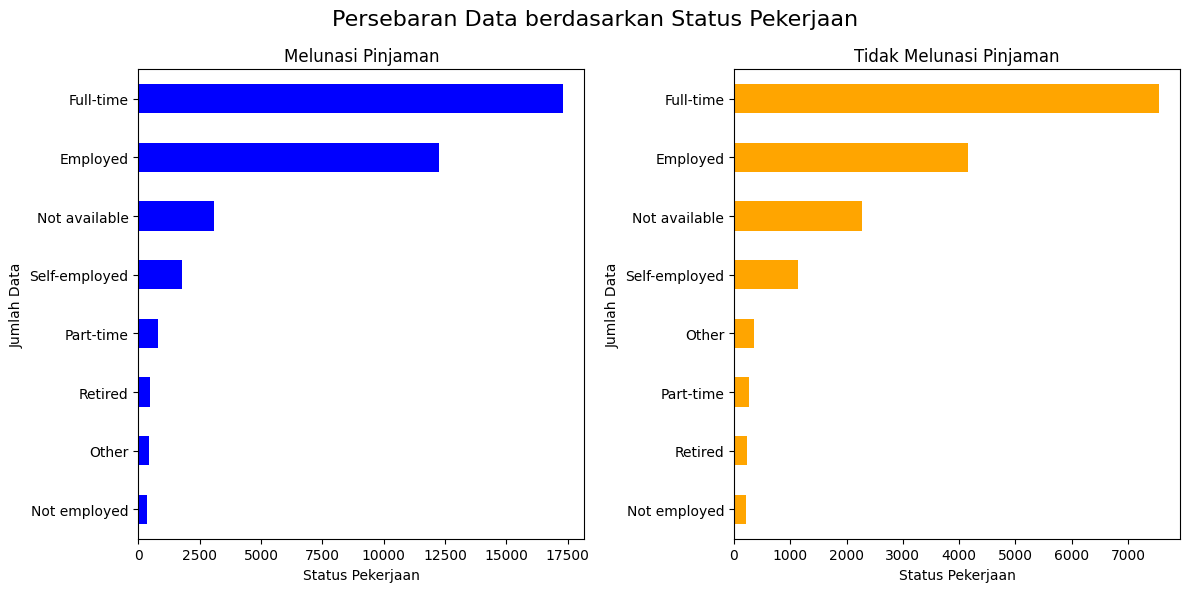

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Persebaran Data berdasarkan Status Pekerjaan', fontsize=16)

# Melunasi Pinjaman
bayar['EmploymentStatus'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Melunasi Pinjaman')
axes[0].set_xlabel('Status Pekerjaan')
axes[0].set_ylabel('Jumlah Data')

# Tidak Melunasi Pinjaman
tidak_bayar['EmploymentStatus'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Tidak Melunasi Pinjaman')
axes[1].set_xlabel('Status Pekerjaan')
axes[1].set_ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, tidak adanya perbedaan antara yang akan melunasi pinjaman dengan yang tidak akan melunasi, sehingga tidak dapat membedakan dari segi status pekerjaan yang akan melunasi ataupun tidak

## Memisahkan dataset yang sudah ditentukan status pembayarannya dan belum

In [18]:
data_sudah_ditentukan = data[(data['LoanStatus'] == 'Completed') |
                             (data['LoanStatus'] == 'Chargedoff') |
                             (data['LoanStatus'] == 'Defaulted')]
data_belum_ditentukan = data[~data.index.isin(data_sudah_ditentukan.index)]

In [19]:
# Membuat kolom baru yang berisi binary antara bayar dan tidak
data_sudah_ditentukan['Pelunasan'] = data_sudah_ditentukan['LoanStatus'].apply(lambda x: '0' if x == 'Completed' else '1')

# Dihilangkan kolom yang sudah digunakan
data_sudah_ditentukan = data_sudah_ditentukan.drop(columns='LoanStatus')

C:\Users\farha\AppData\Local\Temp\ipykernel_2604\1691549230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sudah_ditentukan['Pelunasan'] = data_sudah_ditentukan['LoanStatus'].apply(lambda x: '0' if x == 'Completed' else '1')


## Melihat perbandingan pada 'Occupation'
Yang akan melunasi atau tidak

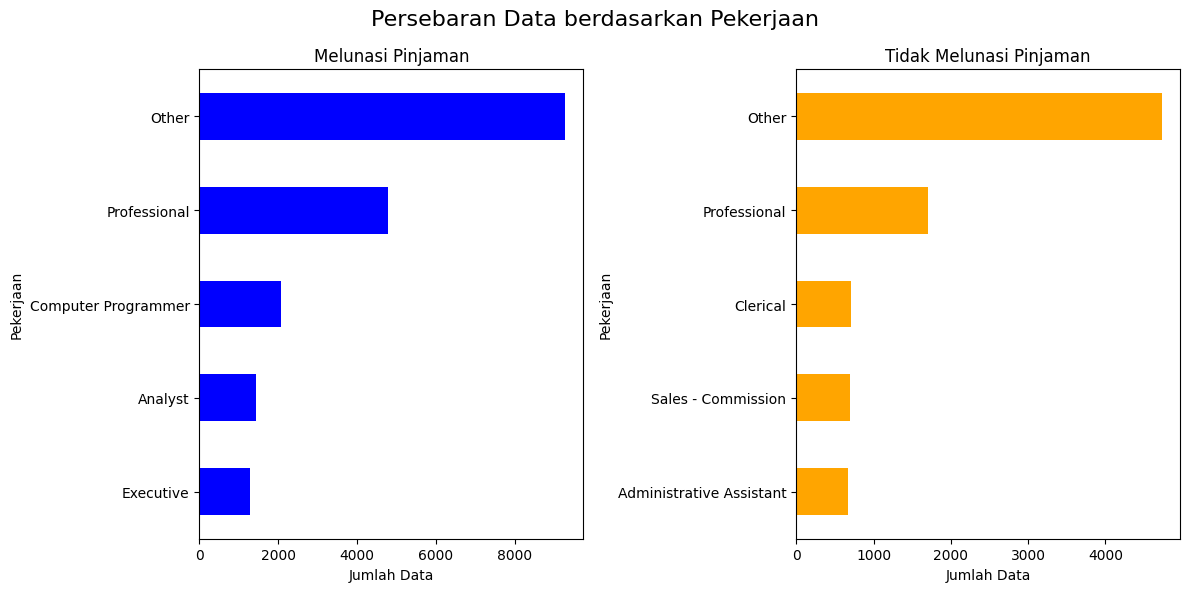

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Persebaran Data berdasarkan Pekerjaan', fontsize=16)

# Melunasi Pinjaman
bayar['Occupation'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Melunasi Pinjaman')
axes[0].set_ylabel('Pekerjaan')
axes[0].set_xlabel('Jumlah Data')

# Tidak Melunasi Pinjaman
tidak_bayar['Occupation'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Tidak Melunasi Pinjaman')
axes[1].set_ylabel('Pekerjaan')
axes[1].set_xlabel('Jumlah Data')

plt.tight_layout()
plt.show()

Melihat grafik diatas, pada pekerjaan 'Other' dan 'Professional' memliki angka yang tinggi antara melunasi pinjaman dan tidak. 'Clerical', 'Sales - Commission', dan 'Administrative Assistant' memiliki angka yang cukup tinggi pada tidak melunasi pinjaman, sehingga jika ada nasabah yang ingin melakukan pengajuan yang memiliki pekerjaan tersebut akan ditinjau lebih lanjut agar tidak menjadi nasabah yang tidak melunasi pinjaman. Sedangkan pada yang melunasi pinjaman ada pada pekerjaan 'Computer Programmer', 'Analyst', dan 'Executive', sehingga nasabah yang memiliki pekerjaan tersebut tidak perlu khawatir untuk melunasi pinjaman.

## Mengecek korelasi antar kolom

<Axes: >

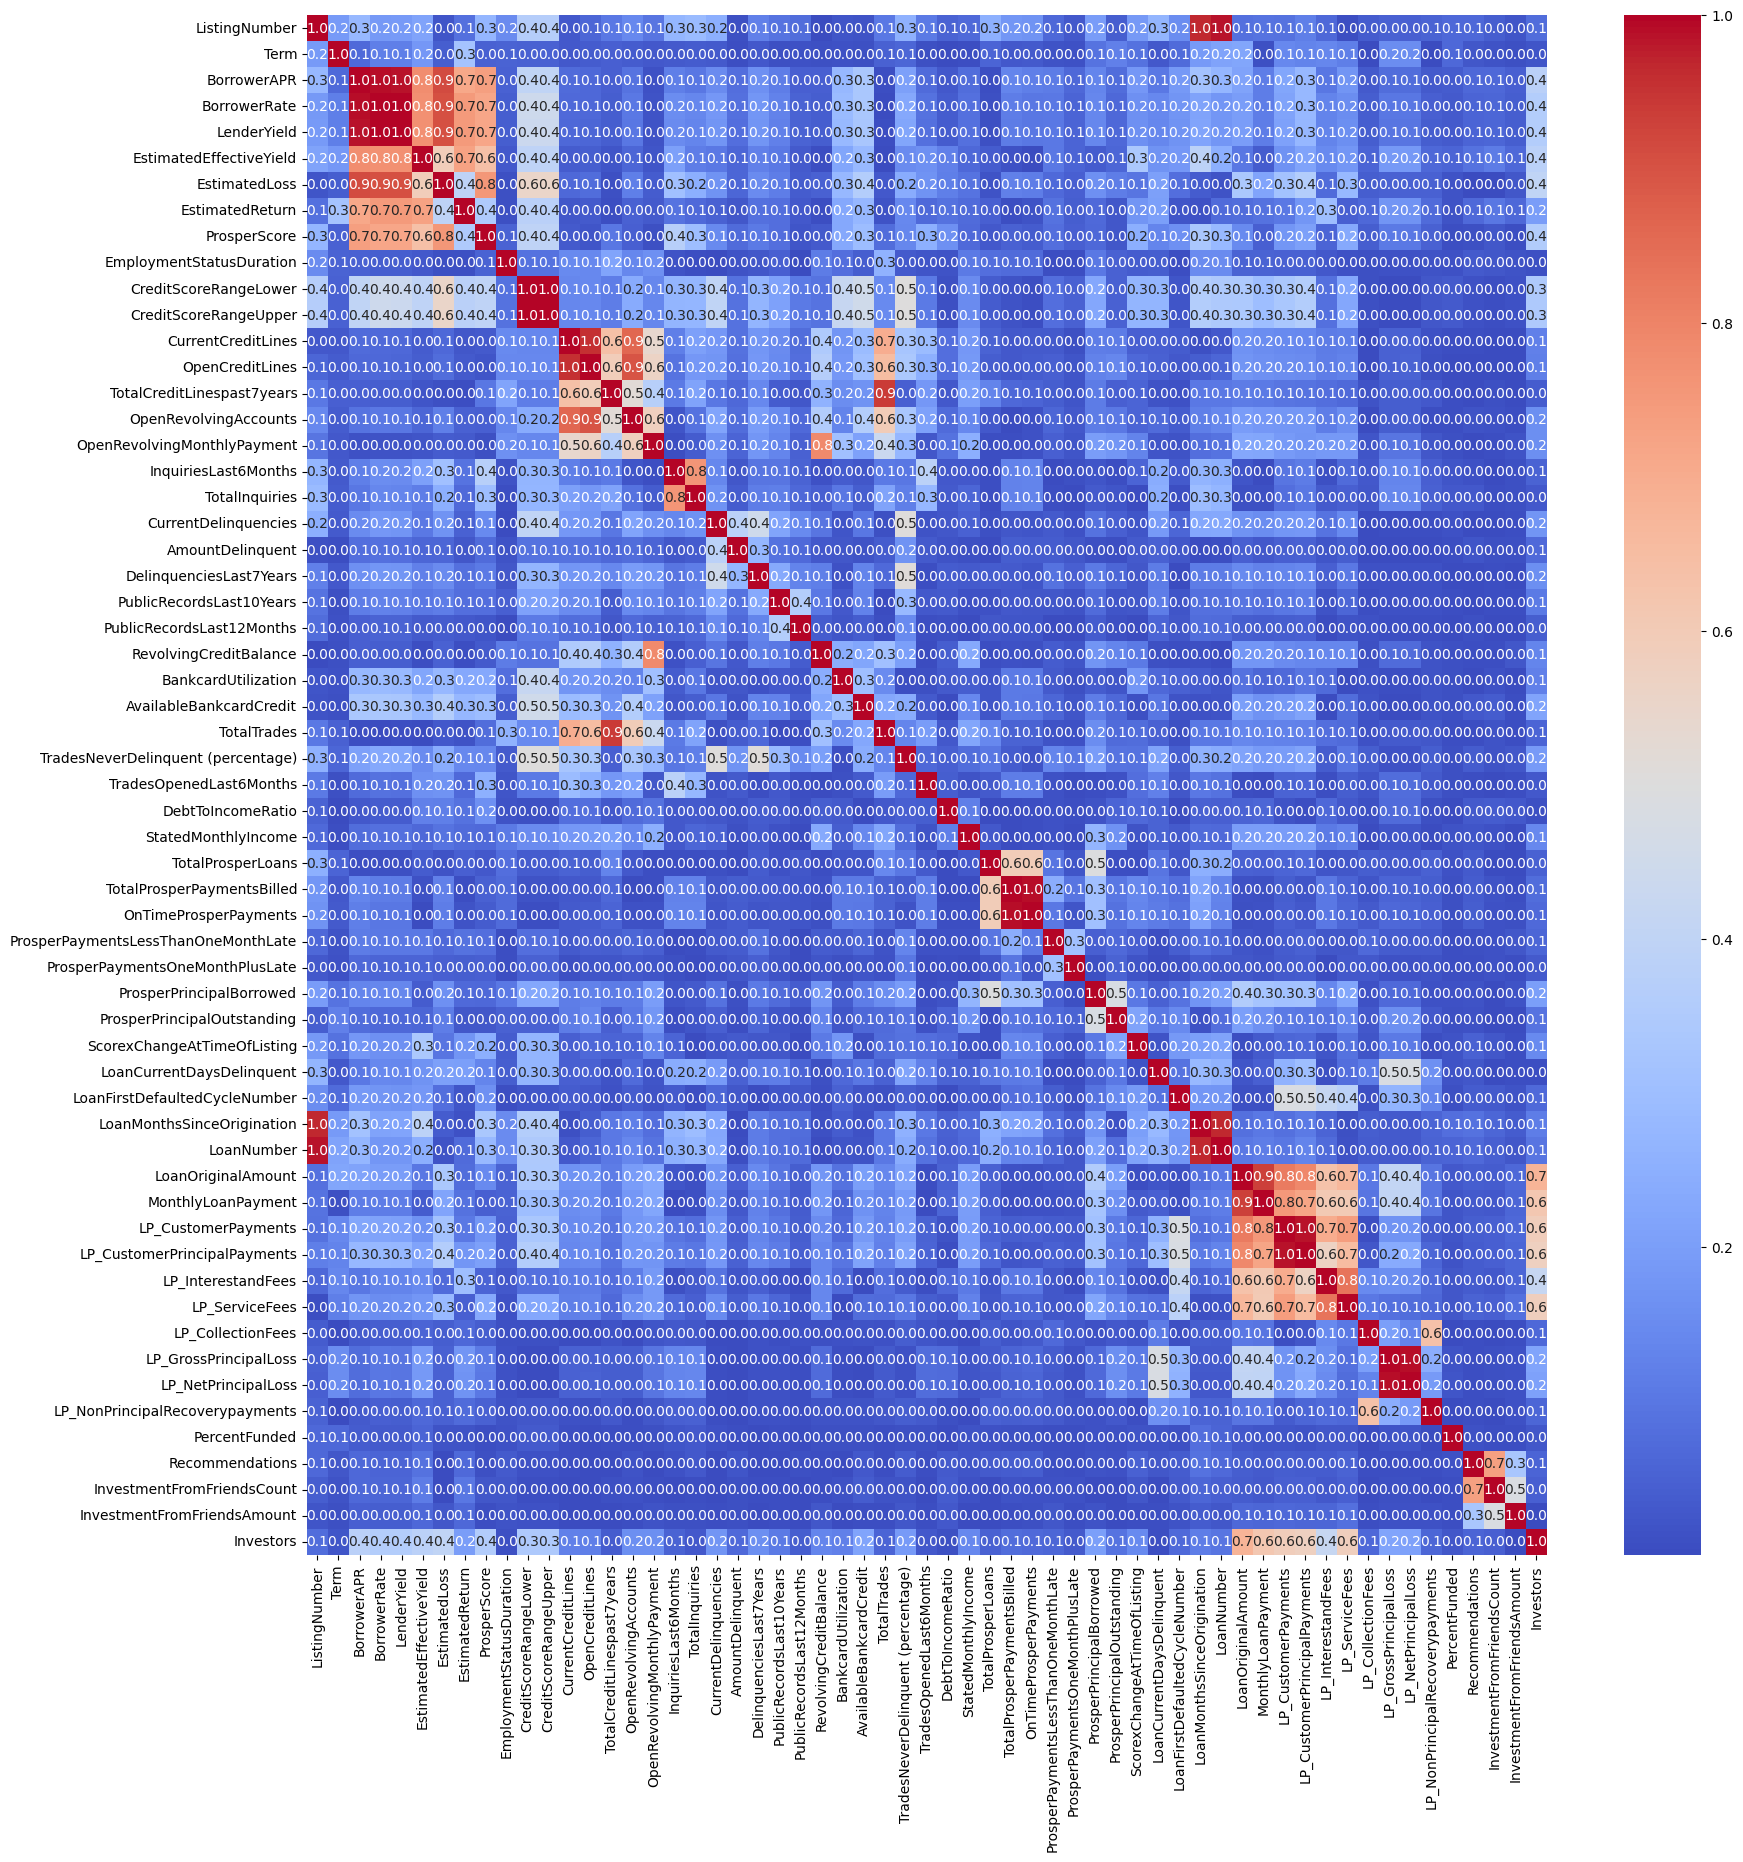

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_sudah_ditentukan.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

Menghilangkan kolom yang memiliki nilai korelasi yang tinggi, terlihat pada nilai korelasinya berupa angka lebih besar dari 0.7

In [22]:
kolom_drop = ['ListingKey','ListingNumber','LoanKey','LoanNumber', 'GroupKey', 'MemberKey', # Nilai yang unique dan tidak penting karena hanya berupa ID nasabah
              'BorrowerAPR', 'LenderYield', # Antara BorrowerAPR, BorrowerRate, dan LenderYield memiliki nilai korelasi sangaat tinggi, jadi digunakan 1 kolom saja, saya pilih BorrowerRate
              'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'CreditGrade', # Score predetermine dari sisi peminjam sehingga akan dihapus terlebih dahulu
              'OpenCreditLines', 'OpenRevolvingAccounts', # Memilih antara OpenCreditLines, CurrentCreditLines, atau OpenRevolingAccounts
              'OnTimeProsperPayments',      # Memilih antara OnTimeProsperPayments atau TotalTimeProsperPayments
              'LP_NetPrincipalLoss',        # Memilih antara LP_GrossPrincipalLoss atau LP_NetPrincipalLoss
              'LP_CustomerPayments',         # Memilih antara LP_CustomerPayments atau LP_CustomerPrincipalPayments
              'LP_InterestandFees','LP_CollectionFees','LP_ServiceFees', 'LP_NonPrincipalRecoverypayments', # Berfokus pada Principal Payments karena hanya ingin berfokus pada satu jenis pembayaran
              'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', # Hanya data waktu, tidak perlu digunakan
              'EstimatedLoss', 'LoanOriginalAmount', 'TotalCreditLinespast7years', # Nilai korelasi tinggi
              'IncomeRange', # Memiliki arti bisnis yang sama dengan StatedMonthlyIncome
              'LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss' # Didrop karena korelasi terhadap target terlalu kuat, sehingga dikhawatirkan akan menjadi fitur yang terlalu dominan
              ]

data_sudah_ditentukan = data_sudah_ditentukan.drop(kolom_drop, axis=1)
data_sudah_ditentukan.shape

(54850, 49)

<Axes: >

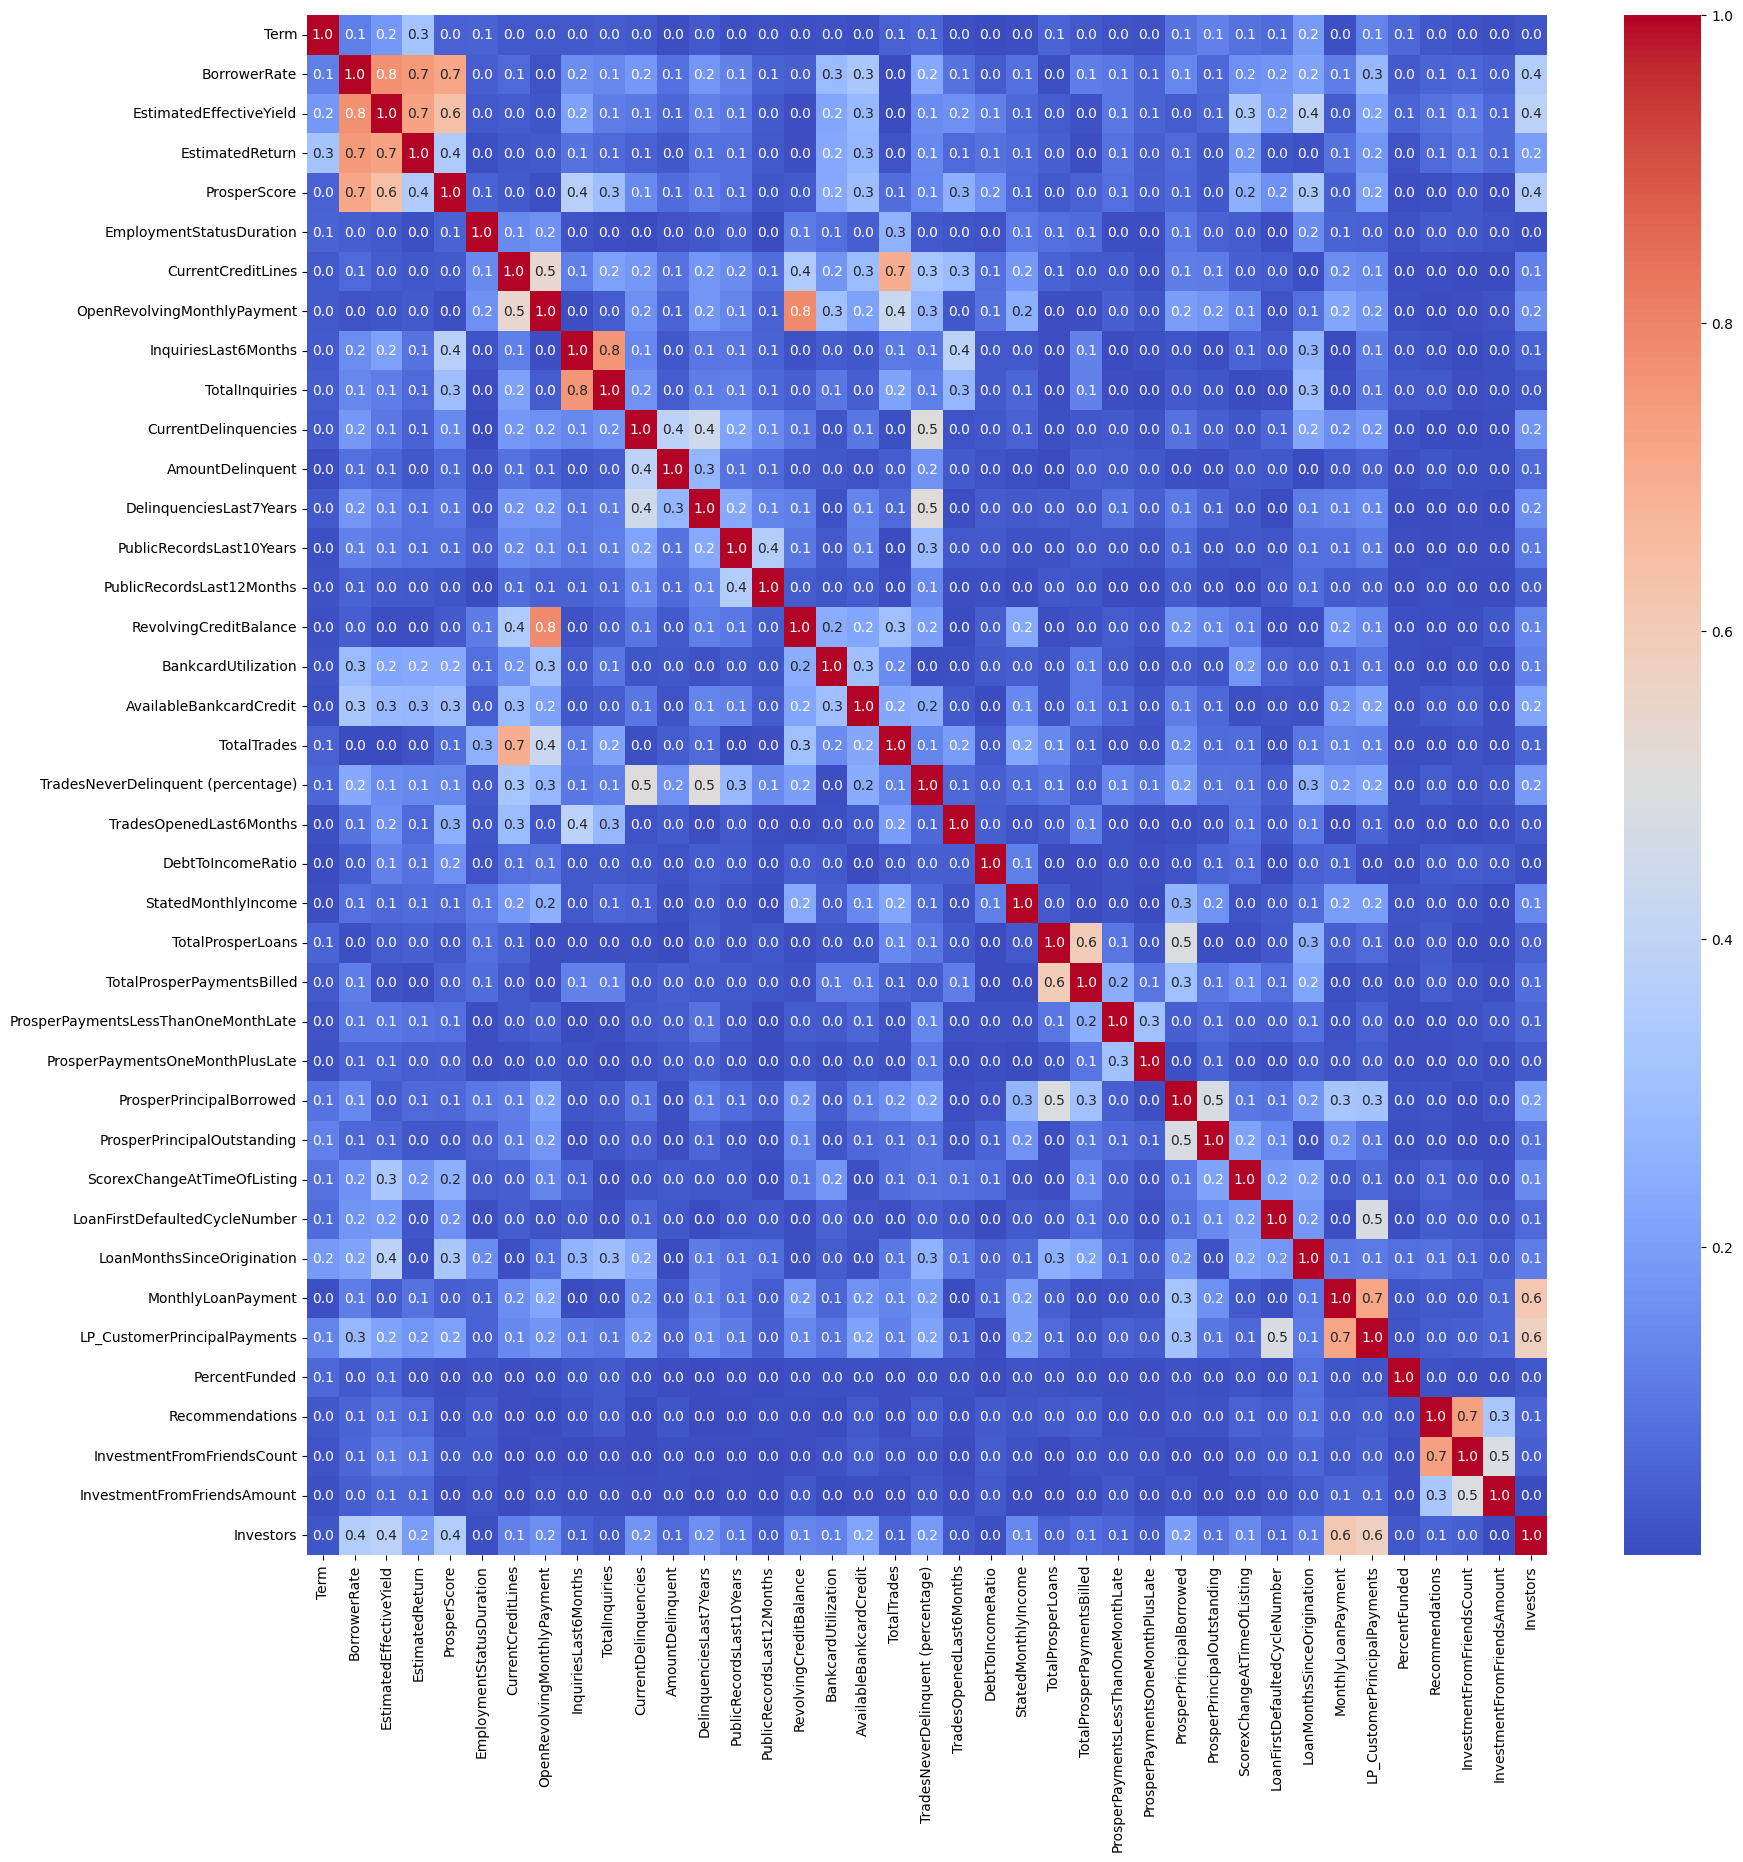

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_sudah_ditentukan.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

## Membuat kategori berdasarkan payment

In [24]:
def kategori_nasabah_payment(payment):
    if payment < 2000:
        return "< 2000"
    elif 2000 <= payment < 5000:
        return "2000 ~ 4999"
    else:
        return ">= 5000"

data_sudah_ditentukan['kategori_nasabah_payment'] = data_sudah_ditentukan['LP_CustomerPrincipalPayments'].apply(kategori_nasabah_payment)

data_sudah_ditentukan = data_sudah_ditentukan.drop(columns=['LP_CustomerPrincipalPayments'])

# v. Model Klasifikasi

Untuk menentukan tipe pelunasan nasabah

## Feature Engineering

### Split antara X (Feature) dan y (Target)

In [25]:
X = data_sudah_ditentukan.drop (['Pelunasan'], axis=1)
y = data_sudah_ditentukan['Pelunasan']

### Split Train-Set dan Test-Set

Train adalah data yang digunakan untuk dilakukan permodelan, sedangkan Test adalah data yang digunakan untuk uji coba dari permodelan yang dilakukan oleh data Train

In [26]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (43880, 48)
X Test Size: (10970, 48)

y Train Size (43880,)
y Test Size: (10970,)


### Handle Missing Value

Melakukan analisa pada data yang hilang pada dataset

#### Pada data X_train

In [27]:
def missing_check(X_train):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_train)

Total    Percent
ScorexChangeAtTimeOfListing          35562  81.043756
ProsperPaymentsOneMonthPlusLate      35482  80.861440
TotalProsperLoans                    35482  80.861440
TotalProsperPaymentsBilled           35482  80.861440
ProsperPrincipalOutstanding          35482  80.861440
ProsperPaymentsLessThanOneMonthLate  35482  80.861440
ProsperPrincipalBorrowed             35482  80.861440
LoanFirstDefaultedCycleNumber        30314  69.083865
ProsperScore                         23084  52.607110
EstimatedReturn                      23084  52.607110
EstimatedEffectiveYield              23084  52.607110
AmountDelinquent                      6094  13.887876
EmploymentStatusDuration              6090  13.878760
PublicRecordsLast12Months             6080  13.855971
CurrentCreditLines                    6080  13.855971
BankcardUtilization                   6080  13.855971
RevolvingCreditBalance                6080  13.855971
TradesOpenedLast6Months               6028  13.737466
TradesNeverDelinquent (percentage)    6028  13.737466
TotalTrades                           6028  13.737466
AvailableBankcardCredit               6028  13.737466
BorrowerState                         4399  10.025068
DebtToIncomeRatio                     3412   7.775752
Occupation                            1828   4.165907
EmploymentStatus                      1816   4.138560
TotalInquiries                         940   2.142206
DelinquenciesLast7Years                798   1.818596
CurrentDelinquencies                   565   1.287603
PublicRecordsLast10Years               565   1.287603
InquiriesLast6Months                   565   1.287603

Nilai persentase yang kurang dari 10%, akan dihilangkan barisnya, dan untuk yang lebih, akan diisi dengan nilai 0 ataupun teks kosong

In [28]:
# Mengisi dengan nilai 0 atau teks kosong
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

X_train[numeric_features] = X_train[numeric_features].fillna(0)
X_train[categorical_features] = X_train[categorical_features].fillna("")

In [29]:
# Mengecek setelah dilakukan pengisian dan penghapusan baris
def missing_check(X_train):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_train)

Empty DataFrame
Columns: [Total, Percent]
Index: []

#### Pada data X_test

In [30]:
def missing_check(X_test):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_test)

Total    Percent
ScorexChangeAtTimeOfListing           8908  81.203282
ProsperPaymentsOneMonthPlusLate       8894  81.075661
TotalProsperLoans                     8894  81.075661
TotalProsperPaymentsBilled            8894  81.075661
ProsperPrincipalOutstanding           8894  81.075661
ProsperPaymentsLessThanOneMonthLate   8894  81.075661
ProsperPrincipalBorrowed              8894  81.075661
LoanFirstDefaultedCycleNumber         7620  69.462170
ProsperScore                          5889  53.682771
EstimatedReturn                       5889  53.682771
EstimatedEffectiveYield               5889  53.682771
AmountDelinquent                      1504  13.710119
EmploymentStatusDuration              1501  13.682771
PublicRecordsLast12Months             1500  13.673655
CurrentCreditLines                    1500  13.673655
BankcardUtilization                   1500  13.673655
RevolvingCreditBalance                1500  13.673655
TradesOpenedLast6Months               1492  13.600729
TradesNeverDelinquent (percentage)    1492  13.600729
TotalTrades                           1492  13.600729
AvailableBankcardCredit               1492  13.600729
BorrowerState                         1093   9.963537
DebtToIncomeRatio                      803   7.319964
Occupation                             428   3.901550
EmploymentStatus                       427   3.892434
TotalInquiries                         212   1.932543
DelinquenciesLast7Years                187   1.704649
CurrentDelinquencies                   130   1.185050
PublicRecordsLast10Years               130   1.185050
InquiriesLast6Months                   130   1.185050

Dilakukan sama seperti pada data X_train

In [31]:
# Mengisi dengan nilai 0 atau teks kosong
X_test[numeric_features] = X_test[numeric_features].fillna(0)
X_test[categorical_features] = X_test[categorical_features].fillna("")

In [32]:
# Mengecek setelah dilakukan pengisian dan penghapusan baris
def missing_check(X_test):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_test)

Empty DataFrame
Columns: [Total, Percent]
Index: []

#### Pada data y_train

In [33]:
y_train.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_train

#### Pada data y_test

In [34]:
y_test.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_test

### Feature Selection

In [35]:
# Menghilangkan data di yang hilang saat handling missing value
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)

In [36]:
# Melihat kolom berdasarkan tipe
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_features)
print ('Kolom kategori : ', categorical_features)

Kolom numeric :  ['Term', 'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedReturn', 'ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'MonthlyLoanPayment', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']
Kolom kategori :  ['ProsperRating',

In [37]:
# Memisahkan train-set dan test-set berdasarkan tipe kolom
X_train_num = X_train[numeric_features]
X_train_cat = X_train[categorical_features]

X_test_num = X_test[numeric_features]
X_test_cat = X_test[categorical_features]

#### Scaling

In [38]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### Encoding

In [39]:
encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [40]:
# Menggabungkan numerik dan kategori
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.5       , 0.46231156, 0.36211366, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.59678392, 0.88295115, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.32683417, 0.66121635, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.25085427, 0.36211366, ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.3718593 , 0.36211366, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.57788945, 0.36211366, ..., 0.        , 1.        ,
        0.        ]])

In [41]:
numeric_feature_names = numeric_features
categorical_feature_names = encoder.get_feature_names_out(categorical_features)

all_feature_names = numeric_feature_names + list(categorical_feature_names)

X_train_final_df = pd.DataFrame(X_train_final, columns=all_feature_names)
X_test_final_df = pd.DataFrame (X_test_final, columns=all_feature_names)
X_train_final_df

Term  BorrowerRate  EstimatedEffectiveYield  EstimatedReturn  \
0       0.5      0.462312                 0.362114         0.390286   
1       1.0      0.596784                 0.882951         0.656136   
2       0.5      0.326834                 0.661216         0.591231   
3       0.5      0.355176                 0.362114         0.390286   
4       0.5      0.361608                 0.694915         0.621105   
...     ...           ...                      ...              ...   
43875   0.5      0.301508                 0.362114         0.390286   
43876   0.0      0.470955                 0.789232         0.536858   
43877   0.5      0.250854                 0.362114         0.390286   
43878   0.5      0.371859                 0.362114         0.390286   
43879   0.5      0.577889                 0.362114         0.390286   

       ProsperScore  EmploymentStatusDuration  CurrentCreditLines  \
0          0.000000                  0.000000            0.000000   
1          0.272727                  0.197351            0.169492   
2          0.727273                  0.023841            0.067797   
3          0.000000                  0.013245            0.254237   
4          0.727273                  0.103311            0.271186   
...             ...                       ...                 ...   
43875      0.000000                  0.000000            0.000000   
43876      0.545455                  0.378808            0.186441   
43877      0.000000                  0.071523            0.152542   
43878      0.000000                  0.197351            0.186441   
43879      0.000000                  0.000000            0.000000   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  ...  \
0                         0.000000              0.000000        0.000000  ...   
1                         0.020420              0.019048        0.015915  ...   
2                         0.049049              0.000000        0.002653  ...   
3                         0.028095              0.057143        0.031830  ...   
4                         0.054054              0.009524        0.010610  ...   
...                            ...                   ...             ...  ...   
43875                     0.005339              0.076190        0.050398  ...   
43876                     0.039640              0.009524        0.010610  ...   
43877                     0.013547              0.009524        0.005305  ...   
43878                     0.016550              0.028571        0.068966  ...   
43879                     0.002135              0.000000        0.015915  ...   

       LoanOriginationQuarter_Q4 2007  LoanOriginationQuarter_Q4 2008  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 1.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
43875                             0.0                             0.0   
43876                             0.0                             0.0   
43877                             0.0                             0.0   
43878                             1.0                             0.0   
43879                             0.0                             0.0   

       LoanOriginationQuarter_Q4 2009  LoanOriginationQuarter_Q4 2010  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...

### Balancing Data

In [42]:
X_train_final_df, y_train = SMOTE (sampling_strategy='minority').fit_resample(X_train_final_df, y_train)

X_train_final_df = pd.DataFrame(X_train_final_df, columns=X_train_final_df.columns)
y_train.value_counts()

Pelunasan
1    30261
0    30261
Name: count, dtype: int64

## Model Definition

In [43]:
model_klasifikasi = DecisionTreeClassifier(random_state=1509)

## Model Training

In [44]:
model_klasifikasi.fit (X_train_final_df, y_train)

DecisionTreeClassifier(random_state=1509)

## Model Evaluation

In [45]:
y_pred_train = model_klasifikasi.predict(X_train_final_df)
y_pred_test = model_klasifikasi.predict(X_test_final_df)

Confusion Matrix Data Train: 
 [[30261     0]
 [    0 30261]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30261
           1       1.00      1.00      1.00     30261

    accuracy                           1.00     60522
   macro avg       1.00      1.00      1.00     60522
weighted avg       1.00      1.00      1.00     60522

Confusion Matrix Data Test: 
 [[7579   28]
 [  29 3334]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7607
           1       0.99      0.99      0.99      3363

    accuracy                           0.99     10970
   macro avg       0.99      0.99      0.99     10970
weighted avg       0.99      0.99      0.99     10970



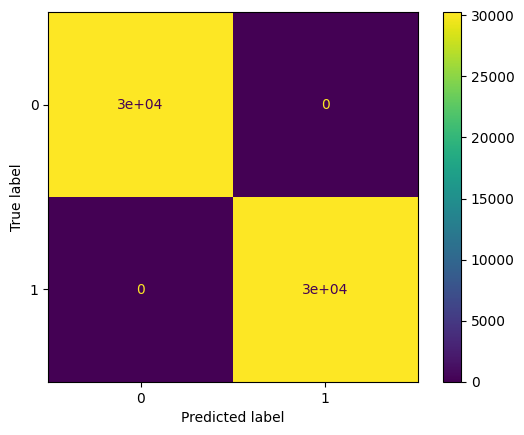

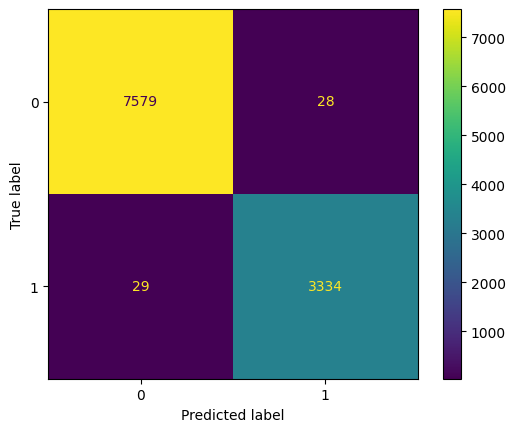

In [46]:
# Memperlihatkan confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train: \n', cm_train)
print(classification_report(y_train, y_pred_train))

cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test: \n', cm_test)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train).plot()
ConfusionMatrixDisplay(cm_test).plot()

In [47]:
y_pred = model_klasifikasi.predict_proba(X_test_final_df)
y_pred

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [48]:
accuracy = model_klasifikasi.score(X_test_final_df, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9948040109389243


### Feature Importance

In [49]:
importance = model_klasifikasi.feature_importances_
feature_names = [i for i in X_train_final_df.columns]

forest_importances = pd.DataFrame({"feature_names":feature_names,"importance":importance})

forest_importances["importance"] = forest_importances["importance"] * 100
forest_importances.sort_values(by='importance', ascending=False)

feature_names  importance
30   LoanFirstDefaultedCycleNumber   98.726675
32              MonthlyLoanPayment    0.383869
0                             Term    0.158293
9                   TotalInquiries    0.048500
12         DelinquenciesLast7Years    0.037378
..                             ...         ...
140             Occupation_Fireman    0.000000
141    Occupation_Flight Attendant    0.000000
142        Occupation_Food Service    0.000000
68                BorrowerState_AK    0.000000
119                    Occupation_    0.000000

[238 rows x 2 columns]

Dari tabel diatas, nilai importance sangat tinggi, sehingga dicoba dihilangkan agar dapat tidak tergantung dengan feature tersebut

In [50]:
X_train_final_df_drop = X_train_final_df.drop(['LoanFirstDefaultedCycleNumber'], axis=1)
X_test_final_df_drop = X_test_final_df.drop(['LoanFirstDefaultedCycleNumber'], axis=1)
X_train_final_df_drop.shape

(60522, 237)

In [51]:
model_klasifikasi.fit (X_train_final_df_drop, y_train)

DecisionTreeClassifier(random_state=1509)

In [52]:
y_pred_train = model_klasifikasi.predict(X_train_final_df_drop)
y_pred_test = model_klasifikasi.predict(X_test_final_df_drop)

Confusion Matrix Data Train: 
 [[30261     0]
 [    0 30261]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30261
           1       1.00      1.00      1.00     30261

    accuracy                           1.00     60522
   macro avg       1.00      1.00      1.00     60522
weighted avg       1.00      1.00      1.00     60522

Confusion Matrix Data Test: 
 [[6886  721]
 [ 567 2796]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7607
           1       0.79      0.83      0.81      3363

    accuracy                           0.88     10970
   macro avg       0.86      0.87      0.86     10970
weighted avg       0.88      0.88      0.88     10970



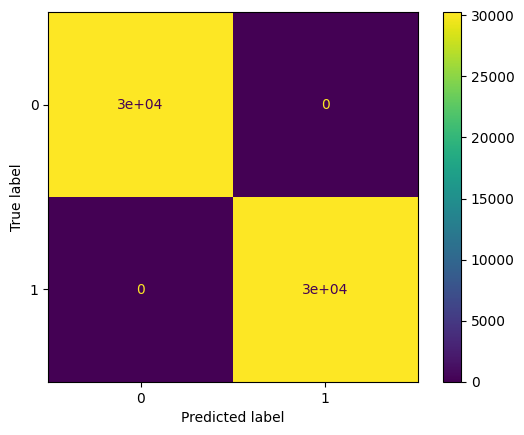

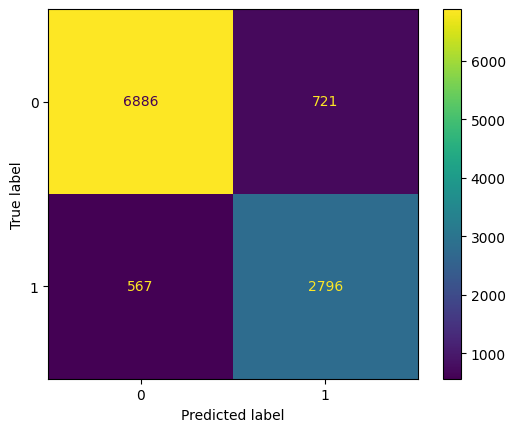

In [53]:
# Memperlihatkan confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train: \n', cm_train)
print(classification_report(y_train, y_pred_train))

cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test: \n', cm_test)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train).plot()
ConfusionMatrixDisplay(cm_test).plot()

#### Improvisasi 1

In [54]:
importance_1 = model_klasifikasi.feature_importances_
feature_names_1 = [i for i in X_train_final_df_drop.columns]

forest_importances_1 = pd.DataFrame({"feature_names":feature_names_1,"importance":importance_1})

forest_importances_1["importance"] = forest_importances_1["importance"]*100
forest_importances_1.sort_values(by='importance', ascending=False)

feature_names  importance
235        kategori_nasabah_payment_< 2000   39.505037
31                      MonthlyLoanPayment   17.789043
236       kategori_nasabah_payment_>= 5000   12.633750
30              LoanMonthsSinceOrigination    2.960012
0                                     Term    2.575062
..                                     ...         ...
61                      ListingCategory_RV    0.000000
38                        ProsperRating_AA    0.000000
206         LoanOriginationQuarter_Q1 2012    0.000000
207         LoanOriginationQuarter_Q1 2013    0.000000
177  Occupation_Student - Technical School    0.000000

[237 rows x 2 columns]

Model ini sudah nilai importancenya sudah tidak diatas 50%, sehingga dapat digunakan. Selanjutnya menghilangkan yang nilai importancenya itu dibawah 1%

In [55]:
filter_forest_importances_1 = forest_importances_1[forest_importances_1["importance"] < 1.5 ]
filter_forest_importances_1.sort_values(by='importance', ascending=False)

feature_names  importance
9             TotalInquiries    1.333097
36                 Investors    1.253653
22       StatedMonthlyIncome    0.970374
21         DebtToIncomeRatio    0.935612
12   DelinquenciesLast7Years    0.866842
..                       ...         ...
144      Occupation_Investor    0.000000
117         BorrowerState_WY    0.000000
145         Occupation_Judge    0.000000
133       Occupation_Dentist    0.000000
113         BorrowerState_VT    0.000000

[230 rows x 2 columns]

In [56]:
kolom_didrop = filter_forest_importances_1['feature_names']
kolom_didrop

2                   EstimatedEffectiveYield
3                           EstimatedReturn
4                              ProsperScore
5                  EmploymentStatusDuration
6                        CurrentCreditLines
                       ...                 
230          LoanOriginationQuarter_Q4 2010
231          LoanOriginationQuarter_Q4 2011
232          LoanOriginationQuarter_Q4 2012
233          LoanOriginationQuarter_Q4 2013
234    kategori_nasabah_payment_2000 ~ 4999
Name: feature_names, Length: 230, dtype: object

In [57]:
X_train_final_df_drop_1 = X_train_final_df_drop.drop(kolom_didrop, axis=1)
X_test_final_df_drop_1 = X_test_final_df_drop.drop(kolom_didrop, axis=1)
X_train_final_df_drop_1.shape

(60522, 7)

In [58]:
model_klasifikasi.fit (X_train_final_df_drop_1, y_train)

DecisionTreeClassifier(random_state=1509)

In [59]:
y_pred_train_drop_1 = model_klasifikasi.predict(X_train_final_df_drop_1)
y_pred_test_drop_1 = model_klasifikasi.predict(X_test_final_df_drop_1)

Confusion Matrix Data Train: 
 [[30217    44]
 [  350 29911]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30261
           1       1.00      0.99      0.99     30261

    accuracy                           0.99     60522
   macro avg       0.99      0.99      0.99     60522
weighted avg       0.99      0.99      0.99     60522

Confusion Matrix Data Test: 
 [[6886  721]
 [ 542 2821]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7607
           1       0.80      0.84      0.82      3363

    accuracy                           0.88     10970
   macro avg       0.86      0.87      0.87     10970
weighted avg       0.89      0.88      0.89     10970



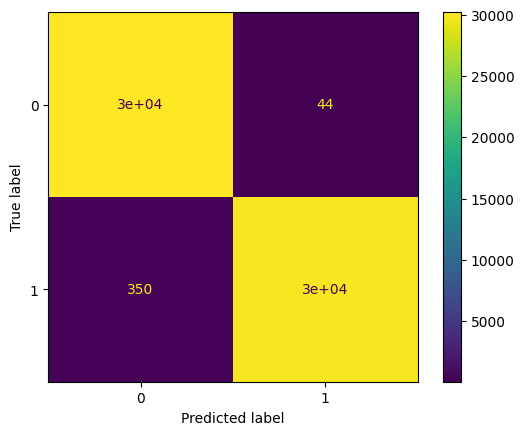

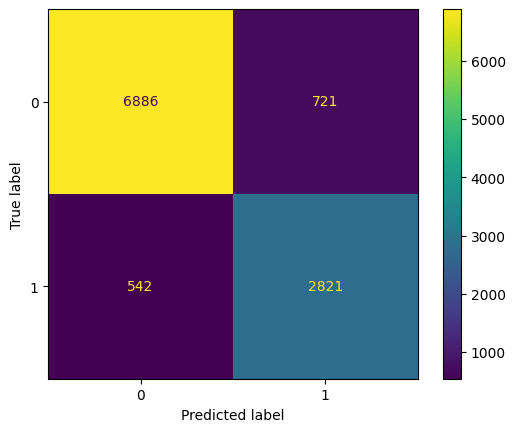

In [60]:
# Memperlihatkan confusion_matrix
cm_train_drop_1 = confusion_matrix(y_train, y_pred_train_drop_1)
print('Confusion Matrix Data Train: \n', cm_train_drop_1)
print(classification_report(y_train, y_pred_train_drop_1))

cm_test_drop_1 = confusion_matrix(y_test, y_pred_test_drop_1)
print('Confusion Matrix Data Test: \n', cm_test_drop_1)
print(classification_report(y_test, y_pred_test_drop_1))

ConfusionMatrixDisplay(cm_train_drop_1).plot()
ConfusionMatrixDisplay(cm_test_drop_1).plot()

#### Improvisasi 2

In [61]:
importance_2 = model_klasifikasi.feature_importances_
feature_names_2 = [i for i in X_test_final_df_drop_1.columns]

forest_importances_2 = pd.DataFrame({"feature_names":feature_names_2,"importance":importance_2})

forest_importances_2["importance"] = forest_importances_2["importance"] * 100
forest_importances_2.sort_values(by='importance', ascending=False)

feature_names  importance
5   kategori_nasabah_payment_< 2000   40.137309
4                MonthlyLoanPayment   23.724510
6  kategori_nasabah_payment_>= 5000   12.913223
3        LoanMonthsSinceOrigination    9.015741
1                      BorrowerRate    7.437636
2              CurrentDelinquencies    4.088144
0                              Term    2.683437

## Cross Validation


In [75]:
score_train_cross_val_klasifikasi = cross_val_score (model_klasifikasi,
                                            X_train_final_df_drop_1, 
                                            y_train,
                                            cv=3)
print('Score - Mean - Cross Validation : ', score_train_cross_val_klasifikasi.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_klasifikasi.std())

Score - Mean - Cross Validation :  0.8911470209180132
Score - Std - Cross Validation  :  0.015360875541387197


In [79]:
import sklearn
print(sklearn.__version__)

1.2.2


In [78]:
from sklearn.model_selection import ValidationCurveDisplay

ImportError: cannot import name 'ValidationCurveDisplay' from 'sklearn.model_selection' (C:\Users\farha\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\__init__.py)

In [77]:
param_name, param_range = "C", np.logspace(-8, 3, 10)

ValidationCurveDisplay.from_estimator(model_klasifikasi, 
X_train_final_df_drop_1, 
y_train, 
param_name=param_name,
param_range=param_range)

plt.show()


NameError: name 'ValidationCurveDisplay' is not defined

# vi. Model Regresi

Membuat dataframe yang hanya berisi Chargedoff dan Defaulted, karena akan digunakan untuk perdiksi regresi

In [200]:
data_defaulted = data[(data['LoanStatus'] == 'Chargedoff') | 
                      (data['LoanStatus'] == 'Defaulted')]

data_defaulted = data_defaulted.drop(columns=['LoanStatus'], axis=1)

Membuat kolom target

In [201]:
data_defaulted['LossRate'] = (data_defaulted['LoanOriginalAmount'] - data_defaulted['LP_CustomerPrincipalPayments']) / data_defaulted['LoanOriginalAmount']
data_defaulted

ListingKey  ListingNumber ListingCreationDate  \
1       A66F3364632427736031107           6328             35:35.9   
4       F737336598792393701AF04          11094             59:31.8   
6       749633653653673451C04EC          15935             39:40.6   
7       E0E1336552565037801A7E4          15873             36:20.6   
8       DFCC33661542209613B1A72          15742             36:15.9   
...                         ...            ...                 ...   
113170  8D0233958630756585E70A4         172935             37:58.1   
113185  2DE63390304421824E2ACDE         148494             02:32.5   
113247  8AB73407661559859490118         253881             24:21.5   
113273  8F5E338909714150518DF2B         134621             23:43.9   
113282                 7.48E+22         127169             46:25.5   

       CreditGrade  Term       ClosedDate  BorrowerAPR  BorrowerRate  \
1                D    36   9/22/2006 0:00      0.23497        0.2275   
4                E    36  10/11/2006 0:00      0.24502        0.2375   
6                E    36   12/4/2006 0:00      0.25757        0.2500   
7                E    36   11/4/2006 0:00      0.22744        0.2200   
8               HR    36  11/10/2006 0:00      0.28771        0.2800   
...            ...   ...              ...          ...           ...   
113170          AA    36  10/31/2010 0:00      0.14307        0.1360   
113185           B    36  10/13/2010 0:00      0.18726        0.1800   
113247           B    36    9/2/2010 0:00      0.20383        0.1965   
113273           B    36   7/23/2010 0:00      0.22643        0.2190   
113282           B    36    9/7/2010 0:00      0.15713        0.1500   

        LenderYield  EstimatedEffectiveYield  ...  LP_CollectionFees  \
1            0.2225                      NaN  ...             -80.77   
4            0.2200                      NaN  ...              -3.06   
6            0.2325                      NaN  ...               0.00   
7            0.2150                      NaN  ...               0.00   
8            0.2750                      NaN  ...               0.00   
...             ...                      ...  ...                ...   
113170       0.1210                      NaN  ...               0.00   
113185       0.1700                      NaN  ...            -461.15   
113247       0.1865                      NaN  ...             -17.00   
113273       0.2090                      NaN  ...              -9.10   
113282       0.1350                      NaN  ...             -10.47   

        LP_GrossPrincipalLoss LP_NetPrincipalLoss  \
1                    10000.00             9004.98   
4                     3001.00             3001.00   
6                     4700.00             4700.00   
7                     3000.00             3000.00   
8                     3100.00             3100.00   
...                       ...                 ...   
113170                1683.61             1683.62   
113185                1388.64               -2.90   
113247                 895.67              925.66   
113273                   3.03              400.93   
113282                  10.84                0.00   

        LP_NonPrincipalRecoverypayments PercentFunded Recommendations  \
1                               2755.12           1.0               0   
4                                100.00           1.0               0   
6                                  0.00           1.0               0   
7                                  0.00           1.0               0   
8                                  0.00           1.0               0   
...                                 ...           ...             ...   
113170                             0.00           1.0               0   
113185                            82.75           1.0               0   
113247                             0.00           1.0               0   
113273                            30.99           1.0               1   
113282    

Mengecek korelasi antar kolom

<Axes: >

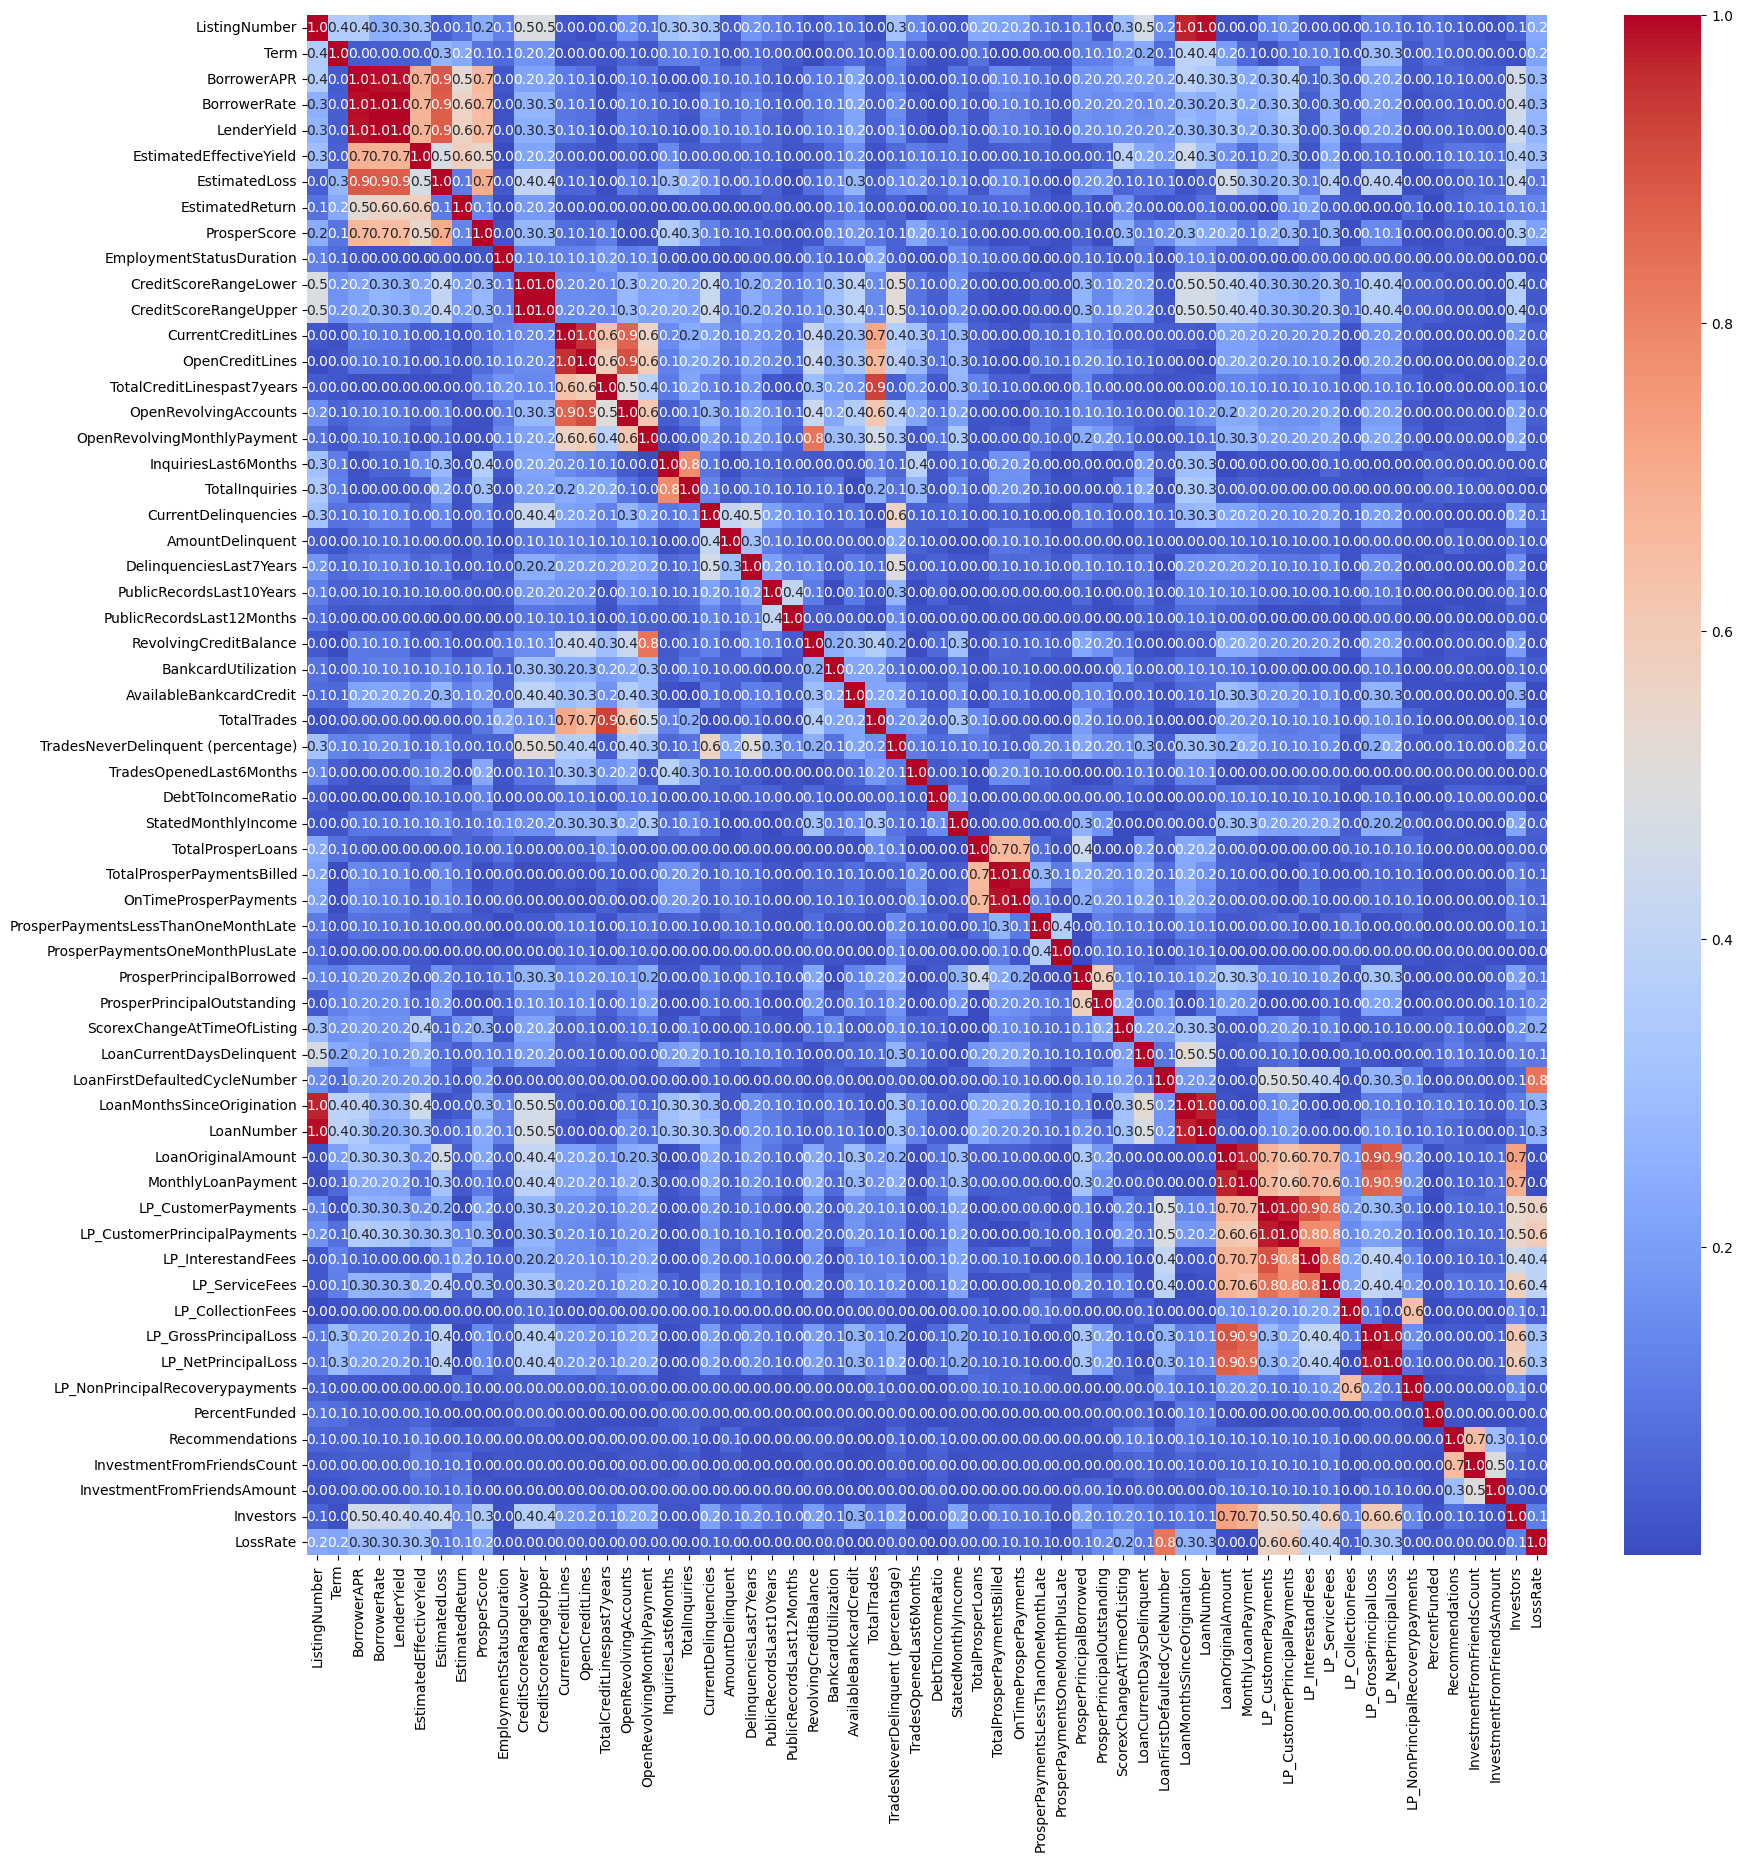

In [202]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_defaulted.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

Membuang kolom yang nilai korelasinya tinggi maupun yang 0

In [203]:
kolom_drop = ['ListingKey','ListingNumber','LoanKey','LoanNumber', 'GroupKey', 'MemberKey', # Nilai yang unique dan tidak penting karena hanya berupa ID nasabah
              'BorrowerAPR', 'LenderYield', # Antara BorrowerAPR, BorrowerRate, dan LenderYield memiliki nilai korelasi sangaat tinggi, jadi digunakan 1 kolom saja, saya pilih BorrowerRate
              'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'CreditGrade', # Score predetermine dari sisi peminjam sehingga akan dihapus terlebih dahulu
              'OpenCreditLines', 'OpenRevolvingAccounts', # Memilih antara OpenCreditLines, CurrentCreditLines, atau OpenRevolingAccounts
              'OnTimeProsperPayments',      # Memilih antara OnTimeProsperPayments atau TotalTimeProsperPayments
              'LP_NetPrincipalLoss',        # Memilih antara LP_GrossPrincipalLoss atau LP_NetPrincipalLoss
              'LP_CustomerPayments',        # Memilih antara LP_CustomerPayments atau LP_CustomerPrincipalPayments
              'LP_InterestandFees','LP_CollectionFees','LP_ServiceFees', 'LP_NonPrincipalRecoverypayments', # Berfokus pada Principal Payments karena hanya ingin berfokus pada satu jenis pembayaran
              'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', # Hanya data waktu, tidak perlu digunakan
              'EstimatedLoss', 'LoanOriginalAmount', 'TotalCreditLinespast7years', # Nilai korelasi tinggi
              'IncomeRange', # Memiliki arti bisnis yang sama dengan StatedMonthlyIncome
              'LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss', # Didrop karena korelasi terhadap target terlalu kuat, sehingga dikhawatirkan akan menjadi fitur yang terlalu dominan
              'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'InquiriesLast6Months','TotalInquiries', 'AmountDelinquent',
                'DelinquenciesLast7Years',	'PublicRecordsLast10Years',	'PublicRecordsLast12Months',	'RevolvingCreditBalance',	'BankcardUtilization',
                'AvailableBankcardCredit',	'TotalTrades',	'TradesNeverDelinquent (percentage)',	'TradesOpenedLast6Months',	'DebtToIncomeRatio',
                'IncomeRange',	'IncomeVerifiable',	'StatedMonthlyIncome',	'LoanKey',	'TotalProsperLoans', 'OpenRevolvingAccounts', 'TotalProsperPaymentsBilled',
                'MonthlyLoanPayment','PercentFunded','Recommendations', 'InvestmentFromFriendsCount',	'InvestmentFromFriendsAmount', 'OpenRevolvingMonthlyPayment',
                'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate'
              ]

data_defaulted = data_defaulted.drop(kolom_drop, axis=1)
data_defaulted.shape

(16982, 22)

<Axes: >

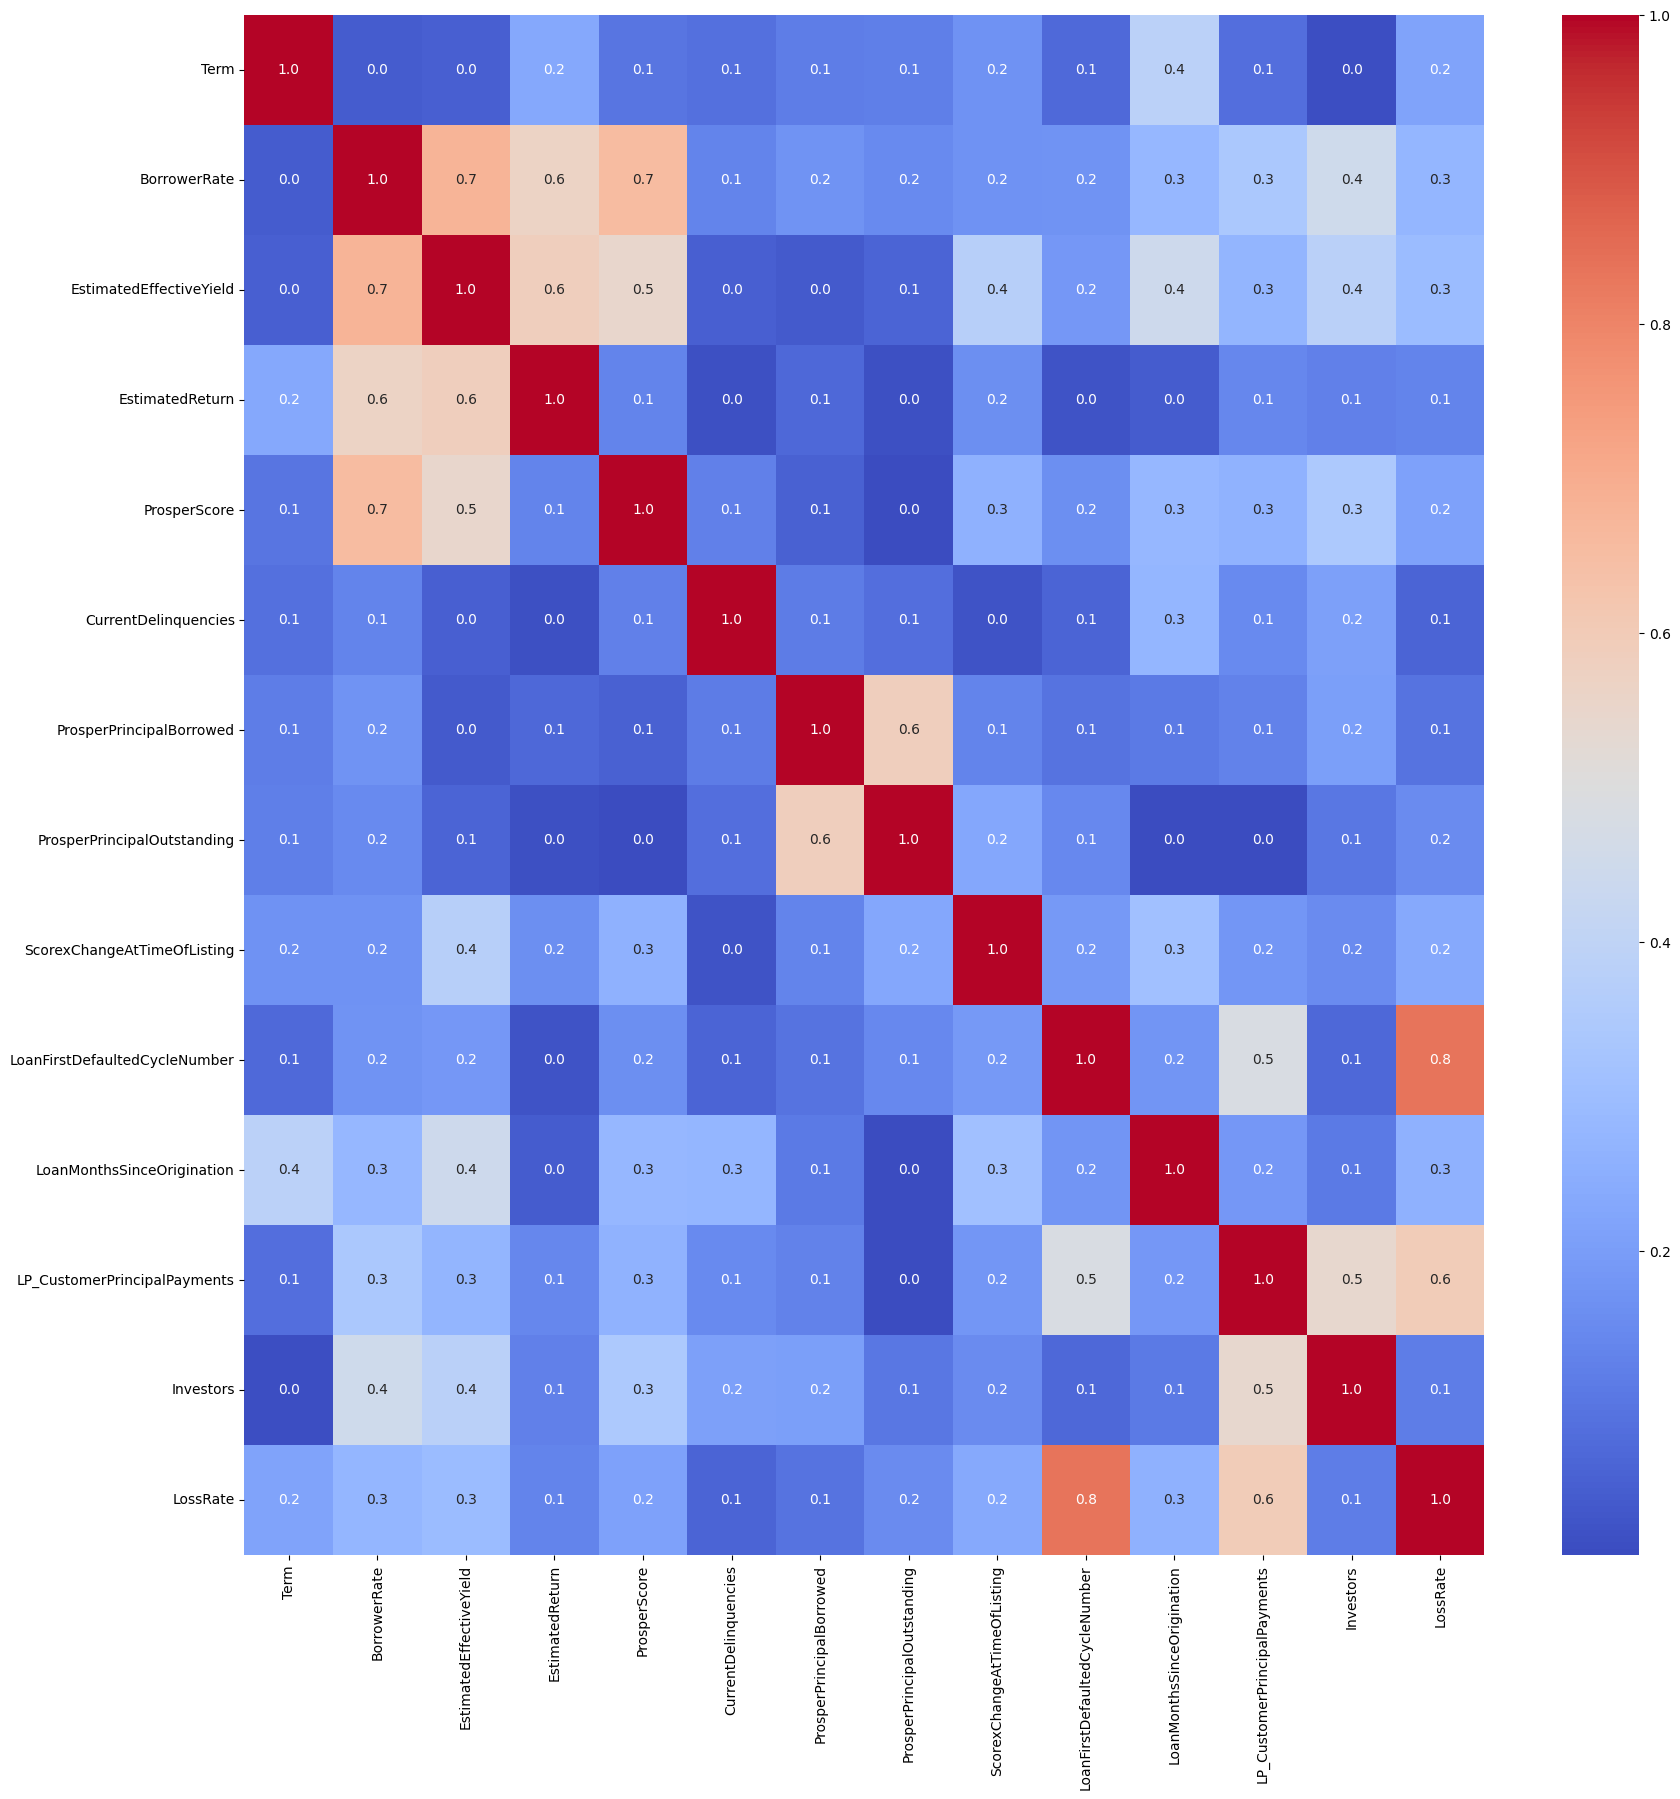

In [204]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_defaulted.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

## Feature Engineering

### Split antara X (Feature) dan y (Target)

In [205]:
X = data_defaulted.drop (['LossRate'], axis=1)
y = data_defaulted['LossRate']

### Split Train-Set dan Test-Set

In [206]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (13585, 21)
X Test Size: (3397, 21)

y Train Size (13585,)
y Test Size: (3397,)


### Handle Missing Value

Melakukan analisa pada data yang hilang pada dataset

#### Pada data X_train

In [207]:
def missing_check(X_train):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_train)

Total    Percent
ScorexChangeAtTimeOfListing    11642  85.697460
ProsperPrincipalBorrowed       11639  85.675377
ProsperPrincipalOutstanding    11639  85.675377
EstimatedEffectiveYield         8543  62.885536
EstimatedReturn                 8543  62.885536
ProsperScore                    8543  62.885536
BorrowerState                   1303   9.591461
Occupation                       644   4.740523
EmploymentStatus                 644   4.740523
CurrentDelinquencies             186   1.369157
LoanFirstDefaultedCycleNumber     90   0.662495

Nilai persentase yang kurang dari 10%, akan dihilangkan barisnya, dan untuk yang lebih, akan diisi dengan nilai 0 ataupun teks kosong

In [208]:
# Mengisi dengan nilai 0 atau teks kosong
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

X_train[numeric_features] = X_train[numeric_features].fillna(0)
X_train[categorical_features] = X_train[categorical_features].fillna("")

#### Pada data X_test

In [209]:
def missing_check(X_test):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_test)

Total    Percent
ScorexChangeAtTimeOfListing     2894  85.192817
ProsperPrincipalBorrowed        2894  85.192817
ProsperPrincipalOutstanding     2894  85.192817
EstimatedEffectiveYield         2110  62.113630
EstimatedReturn                 2110  62.113630
ProsperScore                    2110  62.113630
BorrowerState                    325   9.567265
Occupation                       168   4.945540
EmploymentStatus                 168   4.945540
CurrentDelinquencies              47   1.383574
LoanFirstDefaultedCycleNumber     22   0.647630

Dilakukan sama seperti pada data X_train

In [210]:
# Mengisi dengan nilai 0 atau teks kosong
X_test[numeric_features] = X_test[numeric_features].fillna(0)
X_test[categorical_features] = X_test[categorical_features].fillna("")

#### Pada data y_train

In [211]:
y_train.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_train

#### Pada data y_test

In [212]:
y_test.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_test

### Feature Selection

In [213]:
# Menghilangkan data di yang hilang saat handling missing value
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)

In [214]:
# Melihat kolom berdasarkan tipe
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_features)
print ('Kolom kategori : ', categorical_features)

Kolom numeric :  ['Term', 'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedReturn', 'ProsperScore', 'CurrentDelinquencies', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LP_CustomerPrincipalPayments', 'Investors']
Kolom kategori :  ['ProsperRating', 'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'LoanOriginationQuarter']


In [215]:
# Memisahkan train-set dan test-set berdasarkan tipe kolom
X_train_num = X_train[numeric_features]
X_train_cat = X_train[categorical_features]

X_test_num = X_test[numeric_features]
X_test_cat = X_test[categorical_features]

#### Scaling

In [216]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### Encoding

In [217]:
encoder = OneHotEncoder(handle_unknown = 'ignore')

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [218]:
# Menggabungkan numerik dan kategori
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[1.        , 0.51203181, 0.82313061, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.41410337, 0.36211366, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.35132873, 0.36211366, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.41410337, 0.36211366, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.6603892 , 0.93958126, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.60221804, 0.36211366, ..., 0.        , 0.        ,
        0.        ]])

In [219]:
numeric_feature_names = numeric_features
categorical_feature_names = encoder.get_feature_names_out(categorical_features)

all_feature_names = numeric_feature_names + list(categorical_feature_names)

X_train_final_df = pd.DataFrame(X_train_final, columns=all_feature_names)
X_test_final_df = pd.DataFrame (X_test_final, columns=all_feature_names)
X_train_final_df

Term  BorrowerRate  EstimatedEffectiveYield  EstimatedReturn  \
0       1.0      0.512032                 0.823131         0.743684   
1       0.5      0.414103                 0.362114         0.417088   
2       0.5      0.351329                 0.362114         0.417088   
3       0.5      0.476878                 0.362114         0.417088   
4       0.5      0.539443                 0.848056         0.719568   
...     ...           ...                      ...              ...   
13580   0.5      0.412848                 0.362114         0.417088   
13581   0.5      0.571040                 0.662014         0.762517   
13582   0.5      0.414103                 0.362114         0.417088   
13583   0.5      0.660389                 0.939581         0.703261   
13584   0.5      0.602218                 0.362114         0.417088   

       ProsperScore  CurrentDelinquencies  ProsperPrincipalBorrowed  \
0          0.636364              0.000000                  0.000000   
1          0.000000              0.182927                  0.000000   
2          0.000000              0.121951                  0.000000   
3          0.000000              0.012195                  0.000000   
4          0.545455              0.024390                  0.000000   
...             ...                   ...                       ...   
13580      0.000000              0.000000                  0.000000   
13581      0.636364              0.000000                  0.000000   
13582      0.000000              0.000000                  0.000000   
13583      0.454545              0.000000                  0.000000   
13584      0.000000              0.024390                  0.022556   

       ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  \
0                         0.000000                     0.475490   
1                         0.000000                     0.475490   
2                         0.000000                     0.475490   
3                         0.000000                     0.475490   
4                         0.000000                     0.475490   
...                            ...                          ...   
13580                     0.000000                     0.475490   
13581                     0.000000                     0.475490   
13582                     0.000000                     0.475490   
13583                     0.000000                     0.475490   
13584                     0.035956                     0.573529   

       LoanFirstDefaultedCycleNumber  ...  LoanOriginationQuarter_Q3 2012  \
0                           0.340909  ...                             0.0   
1                           0.931818  ...                             0.0   
2                           0.181818  ...                             0.0   
3                           0.295455  ...                             0.0   
4                           0.295455  ...                             0.0   
...                              ...  ...                             ...   
13580                       0.318182  ...                             0.0   
13581                       0.159091  ...                             0.0   
13582                       0.159091  ...                             0.0   
13583                       0.340909  ...                             0.0   
13584                       0.159091  ...                             0.0   

       LoanOriginationQuarter_Q3 2013  LoanOriginationQuarter_Q4 2006  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             1.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
13580                             0.0                       

## Model Definition

In [220]:
model_regresi = LinearRegression()

## Model Training

In [221]:
model_regresi.fit (X_train_final_df, y_train)

LinearRegression()

## Model Evaluation

In [222]:
y_pred_train = model_regresi.predict(X_train_final_df)
y_pred_test = model_regresi.predict(X_test_final_df)

In [228]:
print('Error - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train))
print('Error - Test Set : ', mean_absolute_percentage_error(y_test, y_pred_test))

Error - Train Set :  2.075971069573877
Error - Test Set :  249752.60567766658


In [224]:
y_pred = model_regresi.predict(X_test_final_df)
y_pred

array([0.83035278, 0.82681274, 0.67489624, ..., 0.84191895, 0.77056885,
       0.55102539])

# vii. Model Clustering

## Model Definition

In [225]:
model_clustering = KMeans(n_init = 'auto', random_state = 1509)

## Model Training

In [226]:
model_clustering.fit ()

TypeError: fit() missing 1 required positional argument: 'X'

# viii. Model Saving

In [ ]:
# Model Klasifikasi
joblib.dump(model_klasifikasi, "model_klasifikasi.pkl") 
joblib.dump(model_regresi, "model_regresi.pkl")


['model_klasifikasi.pkl']

# ix. Model Inference

In [ ]:
new_data = pd.DataFrame({
'ListingKey'                                    :
'ListingNumber'                                 :
'ListingCreationDate'                           :
'CreditGrade'	                                :
'Term'                                          :
'LoanStatus'                                    :
'ClosedDate'                                    :
'BorrowerAPR'                                   :
'BorrowerRate'                                  :
'LenderYield'                                   :
'EstimatedEffectiveYield'                       :
'EstimatedLoss'                                 :
'EstimatedReturn'	                            :
'ProsperRating (numeric)'	                    :
'ProsperRating (Alpha)'	                        :
'ProsperScore'	                                :
'ListingCategory (numeric)'	                    :
'BorrowerState'	                                :
'Occupation'	                                :
'EmploymentStatus'	                            :
'EmploymentStatusDuration'                      :	
'IsBorrowerHomeowner'	                        :
'CurrentlyInGroup'	                            :
'GroupKey'	                                    :
'DateCreditPulled'	                            :
'CreditScoreRangeLower'	                        :
'CreditScoreRangeUpper'	                        :
'FirstRecordedCreditLine'	                    :
'CurrentCreditLines'	                        :
'OpenCreditLines'	                            :
'TotalCreditLinespast7years'	                :
'OpenRevolvingAccounts'	                        :
'OpenRevolvingMonthlyPayment'                   :
'InquiriesLast6Months'	                        :
'TotalInquiries'	                            :
'CurrentDelinquencies'                          :
'AmountDelinquent'	                            :
'DelinquenciesLast7Years'	                    :
'PublicRecordsLast10Years'	                    :
'PublicRecordsLast12Months'	                    :
'RevolvingCreditBalance'	                    :
'BankcardUtilization'	                        :
'AvailableBankcardCredit'	                    :
'TotalTrades'	                                :
'TradesNeverDelinquent (percentage)'            :
'TradesOpenedLast6Months'	                    :
'DebtToIncomeRatio'	                            :
'IncomeRange'	                                :
'IncomeVerifiable'	                            :
'StatedMonthlyIncome'	                        :
'LoanKey'	                                    :
'TotalProsperLoans'	                            :
'TotalProsperPaymentsBilled'	                :
'OnTimeProsperPayments'	                        :
'ProsperPaymentsLessThanOneMonthLate'	        :
'ProsperPaymentsOneMonthPlusLate'	            :
'ProsperPrincipalBorrowed'	                    :
'ProsperPrincipalOutstanding'	                :
'ScorexChangeAtTimeOfListing'	                :
'LoanCurrentDaysDelinquent'	                    :
'LoanFirstDefaultedCycleNumber'	                :
'LoanMonthsSinceOrigination'                    :	
'LoanNumber'	                                :
'LoanOriginalAmount'	                        :
'LoanOriginationDate'	                        :
'LoanOriginationQuarter'	                    :
'MemberKey'	                                    :
'MonthlyLoanPayment'	                        :
'LP_CustomerPayments'	                        :
'LP_CustomerPrincipalPayments'	                :
'LP_InterestandFees'	                        :
'LP_ServiceFees'	                            :
'LP_CollectionFees'	                            :
'LP_GrossPrincipalLoss'	                        :
'LP_NetPrincipalLoss'	                        :
'LP_NonPrincipalRecoverypayments'	            :
'PercentFunded'	                                :
'Recommendations'	                            :
'InvestmentFromFriendsCount'	                :
'InvestmentFromFriendsAmount'	                :
'Investors'                                     :
})

# x. Kesimpulan